In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

from scipy.io import arff
import xgboost as xgb
import os
from sklearn.model_selection import cross_val_score

Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/PHD in AI ML/Dissertation/Experiments/Data/Bondora_preprocessed.csv'
data = pd.read_csv(file_path)
data.head(10)

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,VerificationType,LanguageCode,...,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default,year
0,0,0,115.0410,New_credit_Customer,2009-06-16,2009-07-27,2010-06-25,2010-06-25,Income_unverified_crossref_phone,Estonian,...,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,0,2009
1,0,0,140.6057,Existing_credit_customer,2009-06-15,2009-07-15,2009-07-15,2009-07-15,Income_unverified_crossref_phone,Estonian,...,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,0,2009
2,0,0,319.5580,New_credit_Customer,2009-06-15,2009-07-27,2011-02-25,2014-05-13,Income_unverified_crossref_phone,Estonian,...,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,1,2009
3,0,0,57.5205,New_credit_Customer,2009-06-15,2009-07-15,2010-09-15,2010-09-15,Income_unverified_crossref_phone,Estonian,...,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,0,2009
4,0,0,319.5582,New_credit_Customer,2009-06-14,2009-07-27,2010-06-25,2010-06-25,Income_unverified_crossref_phone,Estonian,...,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,0,2009
5,0,0,300.3845,New_credit_Customer,2009-06-12,2009-08-10,2011-07-11,2011-04-05,Income_unverified_crossref_phone,Estonian,...,300.4314,124.2294,0.00,0.00,3,338.7324,0.0000,0,0,2009
6,0,0,191.7350,New_credit_Customer,2009-06-12,2009-08-03,2011-03-03,2011-03-03,Income_unverified_crossref_phone,Estonian,...,191.7445,172.9222,0.00,0.00,1,223.6709,0.0000,0,0,2009
7,0,0,31.9558,New_credit_Customer,2009-07-20,2009-09-01,2010-02-01,2010-02-01,Income_unverified_crossref_phone,Estonian,...,31.9518,11.3105,0.00,0.00,3,428.2235,0.0000,0,0,2009
8,0,0,31.9559,New_credit_Customer,2009-07-22,2009-09-01,2010-08-02,2010-08-02,Income_unverified_crossref_phone,Estonian,...,31.9498,16.4482,0.00,0.00,4,460.1753,0.0000,0,0,2009
9,0,0,319.5581,New_credit_Customer,2009-07-22,2009-09-10,2010-08-10,2010-08-10,Income_unverified_crossref_phone,Estonian,...,319.5583,45.4153,0.00,0.00,0,0.0000,0.0000,0,0,2009


In [ ]:
print("Bondora Dataset Info:")
print(data.info())

Bondora Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    77394 non-null  int64  
 1   BidsApi                                 77394 non-null  int64  
 2   BidsManual                              77394 non-null  float64
 3   NewCreditCustomer                       77394 non-null  object 
 4   LoanDate                                77394 non-null  object 
 5   FirstPaymentDate                        77394 non-null  object 
 6   MaturityDate_Original                   77394 non-null  object 
 7   MaturityDate_Last                       77394 non-null  object 
 8   VerificationType                        77349 non-null  object 
 9   LanguageCode                            77394 non-null  object 
 10  Age                                 

In [ ]:
data.describe()

,BidsPortfolioManager,BidsApi,BidsManual,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,IncomeTotal,...,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default,year
count,77394.000000,77394.000000,77394.000000,77394.000000,77394.000000,77394.000000,77394.00000,77394.000000,70767.000000,7.739400e+04,...,77394.000000,77394.000000,77394.000000,77394.000000,77394.000000,77394.000000,58078.000000,77394.000000,77394.000000,77394.000000
mean,1221.504303,32.766506,563.032056,39.611611,2746.981169,2472.673771,40.30165,44.425498,130.393314,1.868975e+03,...,1077.613937,502.770026,1372.262893,1215.017495,1.140799,2172.676382,861.138387,0.077474,0.591415,2016.738016
std,1531.208800,163.557245,821.757218,12.188868,2463.487043,2163.710046,30.61795,16.412387,131.480383,6.193487e+03,...,1648.865768,829.168708,1944.295361,3220.010093,2.028045,3889.556046,2076.791326,0.384662,0.491575,2.146195
min,0.000000,0.000000,0.000000,0.000000,31.955800,6.390000,3.00000,1.000000,0.000000,0.000000e+00,...,0.000000,0.000000,-34.200000,-2.660000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000
25%,246.000000,0.000000,19.000000,30.000000,740.000000,740.000000,23.42000,36.000000,37.975000,8.900000e+02,...,61.690000,37.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
50%,613.000000,0.000000,283.000000,38.000000,2125.000000,2020.000000,31.95500,48.000000,101.130000,1.300000e+03,...,462.810000,191.165000,516.865000,84.805000,0.000000,0.000000,40.815000,0.000000,1.000000,2017.000000
75%,1629.000000,5.000000,745.000000,48.000000,3720.000000,3185.000000,50.33000,60.000000,175.475000,2.000000e+03,...,1451.292500,612.415000,2111.980000,1083.985000,1.000000,3000.000000,653.740000,0.000000,1.000000,2018.000000
max,10625.000000,7570.000000,10630.000000,77.000000,10632.000000,10632.000000,264.31000,60.000000,2368.540000,1.012019e+06,...,10632.000000,14507.240000,10632.000000,64494.770000,24.000000,51104.000000,34077.420000,11.000000,1.000000,2020.000000


In [ ]:
# List of columns to drop
drop_columns = ['LoanDate', 'year', 'FirstPaymentDate', 'MaturityDate_Original', 'LanguageCode', 'MaturityDate_Last', 'BidsPortfolioManager', 'BidsApi', 'BidsManual', 'County', 'City', 'Country',
                'MonthlyPaymentDay', 'LastPaymentOn', 'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade', 'Default', 'PrincipalBalance', 'InterestAndPenaltyBalance', 'MonthlyPayment', 'Interest',
               'Restructured', 'Rating' ]

# Drop the specified columns
data = data.drop(columns=drop_columns)

In [ ]:
data.head()

,NewCreditCustomer,VerificationType,Age,Gender,AppliedAmount,Amount,LoanDuration,UseOfLoan,Education,MaritalStatus,...,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,New_credit_Customer,Income_unverified_crossref_phone,61,Female,319.5582,115.0408,12,Other,Vocational,Married,...,0,0.0,0,0.0,0.0,NaN,1,83.0852,0.0000,0
1,Existing_credit_customer,Income_unverified_crossref_phone,48,Female,191.7349,140.6057,1,Other,Higher,Divorced,...,0,0.0,0,0.0,0.0,NaN,2,255.6467,258.6256,0
2,New_credit_Customer,Income_unverified_crossref_phone,58,Female,319.5582,319.5409,20,Home_improvement,Secondary,Married,...,0,0.0,0,0.0,0.0,NaN,0,0.0000,0.0000,0
3,New_credit_Customer,Income_unverified_crossref_phone,23,Female,127.8233,57.5205,15,Loan_consolidation,Basic,Single,...,0,0.0,0,0.0,0.0,NaN,1,134.2144,0.0000,0
4,New_credit_Customer,Income_unverified_crossref_phone,25,Female,319.5582,319.5436,12,Vehicle,Secondary,Cohabitant,...,0,0.0,0,0.0,0.0,NaN,1,146.9966,0.0000,0


In [ ]:
# Keep only rows where Gender is either 'Male' or 'Female'
data = data[data['Gender'].isin(['Male', 'Female'])]

In [ ]:
# List of loan purposes to drop
loan_purposes = ['Education', 'Health', 'Home_improvement', 'Travel']

# Drop rows where UseOfLoan matches any of the specified purposes
data = data[~data['UseOfLoan'].isin(loan_purposes)]

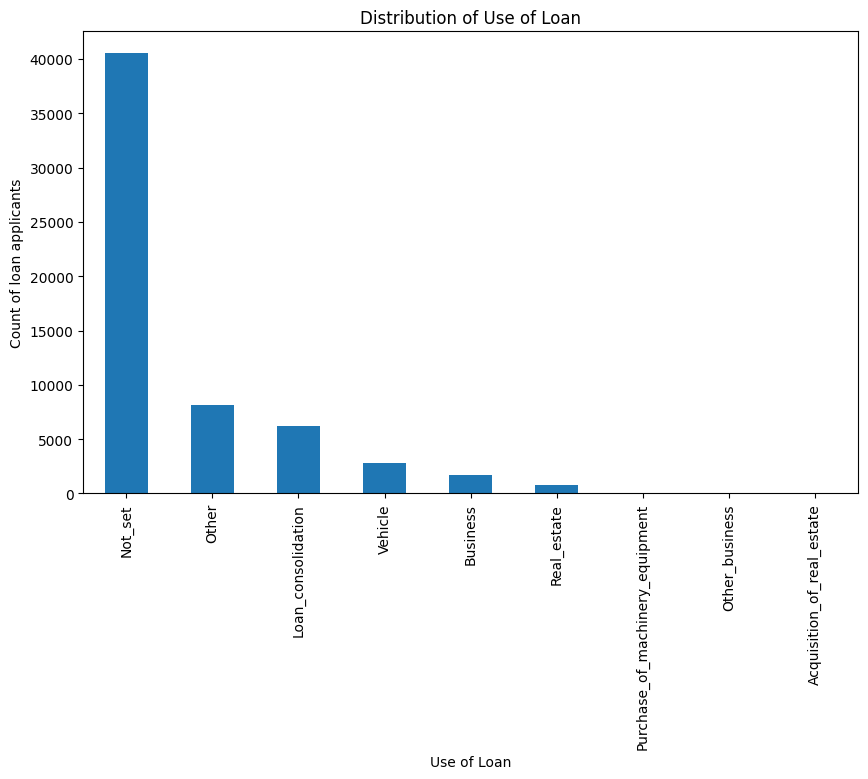

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of the UseOfLoan column
plt.figure(figsize=(10, 6))
data['UseOfLoan'].value_counts().plot(kind='bar')
plt.title('Distribution of Use of Loan')
plt.xlabel('Use of Loan')
plt.ylabel('Count of loan applicants')
plt.show()

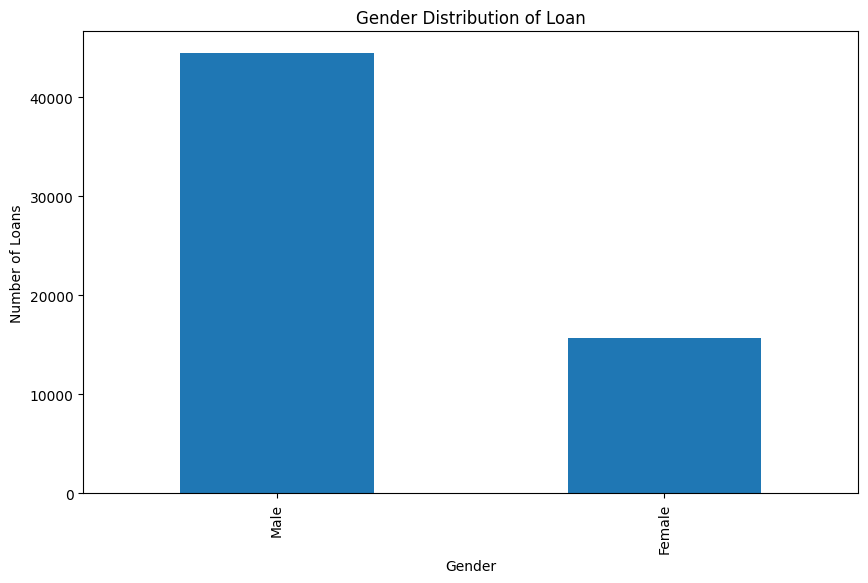

In [ ]:

plt.figure(figsize=(10, 6))
data['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution of Loan')
plt.xlabel('Gender')
plt.ylabel('Number of Loans')
plt.show()

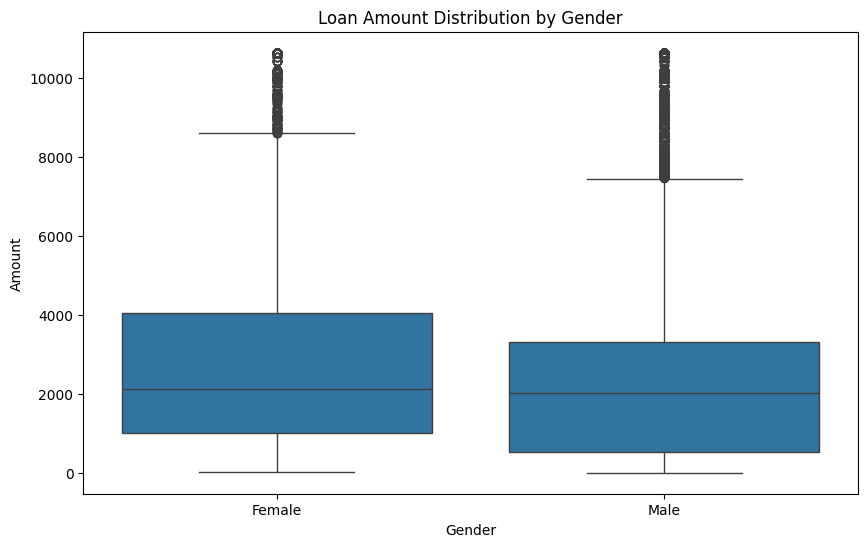

In [ ]:
# Checking the distribution of loan amounts by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Amount', data=data)
plt.title('Loan Amount Distribution by Gender')
plt.show()

In [ ]:
label_cols = ['Gender']
pd.value_counts(data[label_cols].values.flatten())

/tmp/ipython-input-3547207857.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data[label_cols].values.flatten())


,count
Male,44432
Female,15676


males are 74% and females are 26%

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop columns with more than 50% missing values
threshold = 0.5 * len(data)
data = data.loc[:, data.isnull().sum() < threshold]

Missing Values:
 NewCreditCustomer                             0
VerificationType                              0
Age                                           0
Gender                                        0
AppliedAmount                                 0
Amount                                        0
LoanDuration                                  0
UseOfLoan                                     0
Education                                     0
MaritalStatus                                 0
EmploymentStatus                            107
EmploymentDurationCurrentEmployer           545
OccupationArea                               24
HomeOwnershipType                          1077
IncomeTotal                                   0
ExistingLiabilities                           0
LiabilitiesTotal                              0
RefinanceLiabilities                          0
DebtToIncome                                  0
FreeCash                                      0
CreditScoreEsMicroL    

In [ ]:
# Impute numerical missing values with the median
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Impute categorical missing values with the mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

/tmp/ipython-input-3967499249.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
/tmp/ipython-input-3967499249.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
# Drop duplicate rows
data = data.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(data)}")

Number of rows after removing duplicates: 60074


In [ ]:
# Convert numerical columns stored as strings to numeric
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_numeric(data[col])
        except:
            continue

# Convert categorical columns to 'category' dtype
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].astype('category')

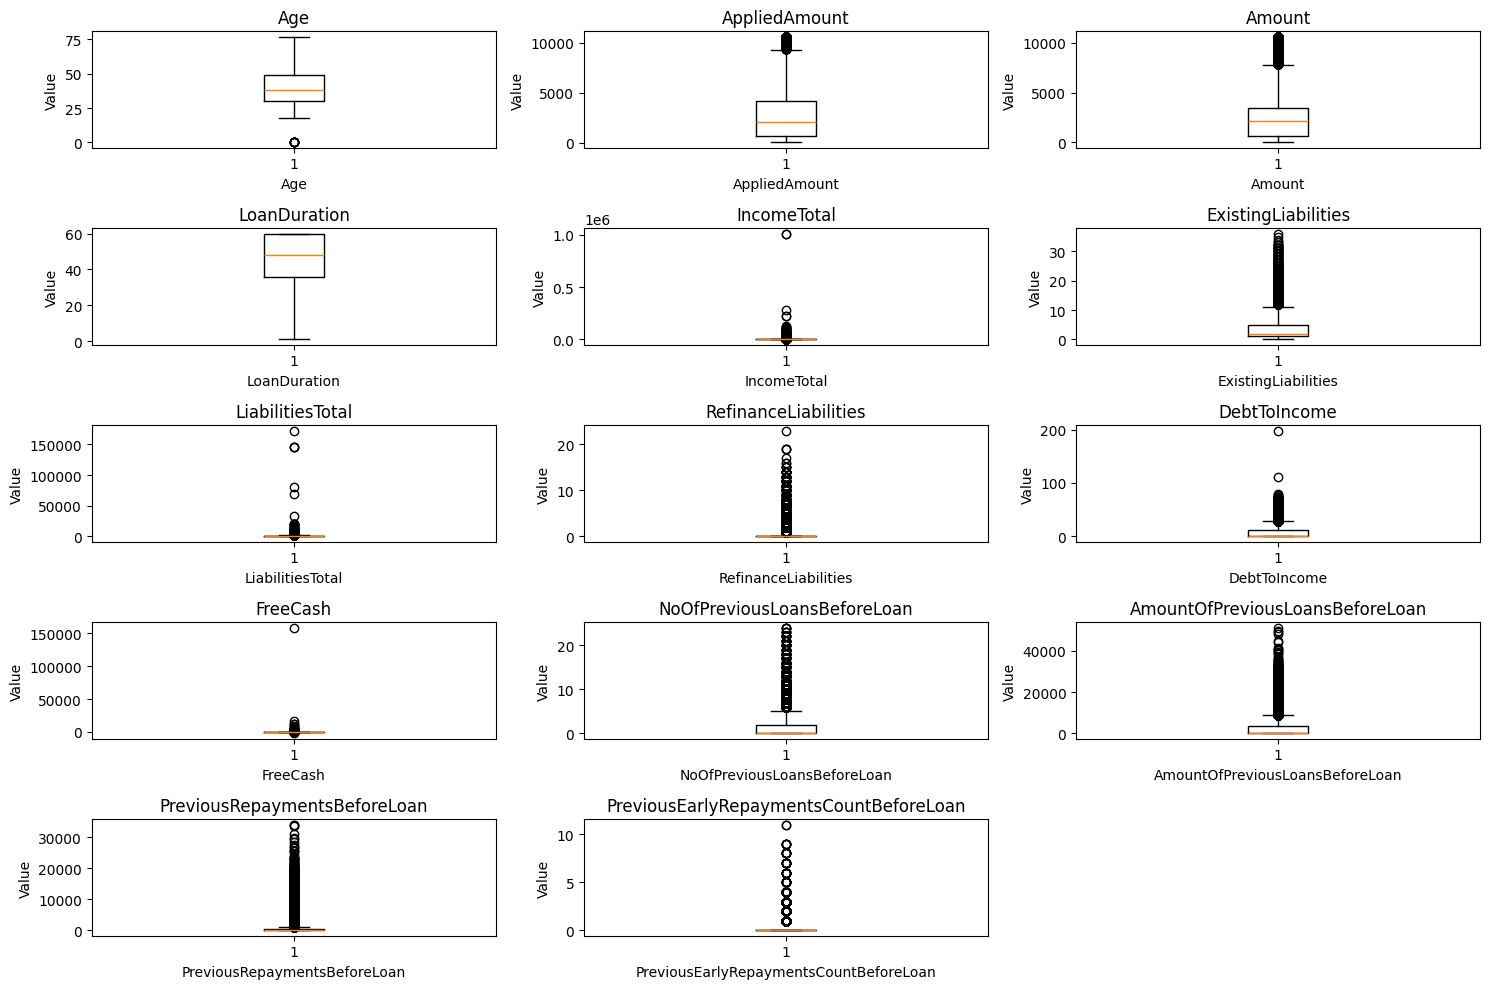

In [ ]:
# Plotting box plots for all numerical columns to check for outliers
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i)  # Arranging in a grid format
    plt.boxplot(data[col].dropna())
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

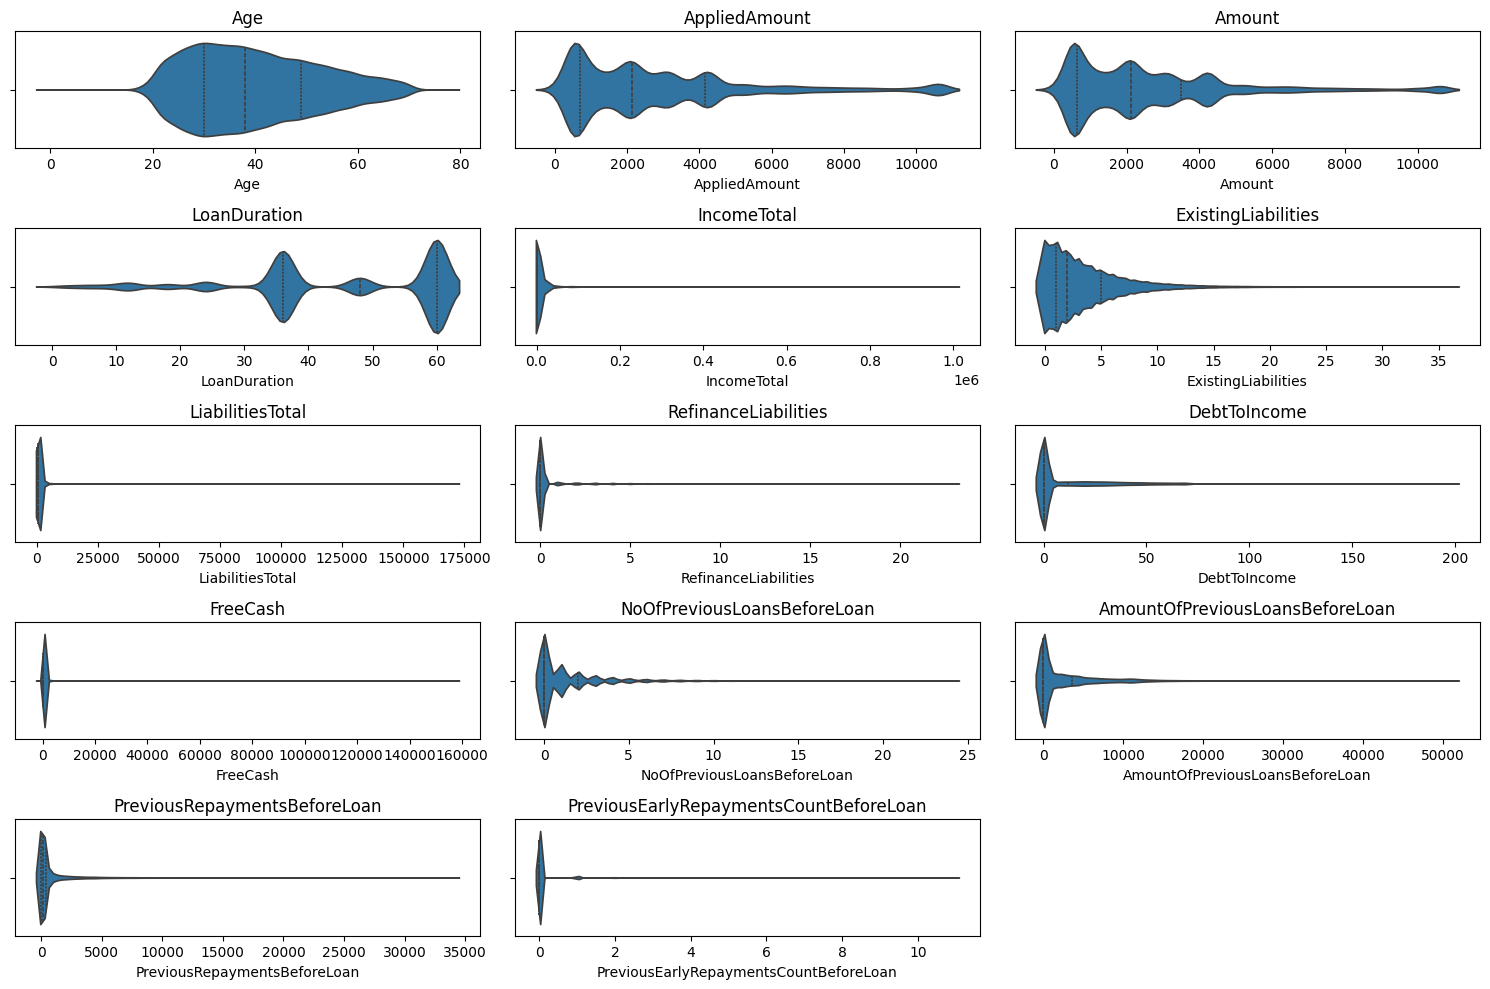

In [ ]:
#check for outliers and overall distribution with violin plot

import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i)
    sns.violinplot(x=data[col].dropna(), inner="quartile")
    plt.title(col)

plt.tight_layout()
plt.show()


In [ ]:
# see what variables are highly correlated to gender

#  Make a copy of the data
df_temp = data.copy()

# Check if 'Gender' column exists
print("Gender column present:", "Gender" in df_temp.columns)

# Show unique values in the Gender column
print("Unique Gender values:", df_temp["Gender"].unique())

# Filter rows to include only Male and Female (ignore NaNs, 'Other', etc.)
df_temp = df_temp[df_temp["Gender"].isin(["Male", "Female"])]

# Map to binary
df_temp["Gender_binary"] = df_temp["Gender"].map({"Male": 1, "Female": 0})

# Confirm that Gender_binary was created
print("Gender_binary column head:\n", df_temp["Gender_binary"].head())


Gender column present: True
Unique Gender values: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
Gender_binary column head:
 0    0
1    0
3    0
4    0
5    1
Name: Gender_binary, dtype: category
Categories (2, int64): [0, 1]


In [ ]:
# Convert Gender_binary to float or int
df_temp["Gender_binary"] = df_temp["Gender_binary"].astype(float)

# Correlation with Gender_binary
gender_corr = df_temp.corr(numeric_only=True)["Gender_binary"].sort_values(key=abs, ascending=False)

# Print top features correlated with gender
print("Top numeric features correlated with gender:")
print(gender_corr[1:11])


Top numeric features correlated with gender:
DebtToIncome                      -0.213508
AmountOfPreviousLoansBeforeLoan    0.148184
RefinanceLiabilities              -0.144048
NoOfPreviousLoansBeforeLoan        0.132689
Amount                            -0.054791
PreviousRepaymentsBeforeLoan       0.052853
AppliedAmount                     -0.045640
FreeCash                          -0.040492
ExistingLiabilities               -0.036833
LoanDuration                      -0.030884
Name: Gender_binary, dtype: float64


In [ ]:
# drop features with high correlation
features_to_drop = [
    "DebtToIncome", #dropped because it is likely derived from liabilities total and income total
    # "AmountOfPreviousLoansBeforeLoan",
    # "RefinanceLiabilities",
    # "NoOfPreviousLoansBeforeLoan",
    "AppliedAmount"  # dropped this because it correlates with amount
]

# Drop from working dataset (before modeling)
data = data.drop(columns=features_to_drop)

In [ ]:
# log transform key variables
import numpy as np

log_transform_cols = ['IncomeTotal', 'LiabilitiesTotal', 'FreeCash', 'Amount']

for col in log_transform_cols:
    # Log only non-negative and non-null values
    data[col] = data[col].apply(lambda x: np.log1p(x) if pd.notnull(x) and x >= 0 else np.nan)

    # Fill NaNs with the column's median
    data[col] = data[col].fillna(data[col].median())


In [ ]:
# remove outliers
columns_to_clean = ['IncomeTotal', 'FreeCash', 'Amount']

for col in columns_to_clean:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print(f"Data size after cleaning: {data.shape[0]} rows")

Data size after cleaning: 58526 rows


In [ ]:
# Standardize categorical values (e.g., Male, male, MALE -> Male)
for col in categorical_cols:
    data[col] = data[col].str.capitalize()

In [ ]:
## label encoding for education

# Drop rows where Education is 'Not_present'
data = data[data['Education'] != 'Not_present']

# Define the education order (from lowest to highest)
education_order = ['Basic', 'Primary', 'Secondary', 'Vocational', 'Higher']

# Map education levels to numeric values
education_mapping = {level: idx for idx, level in enumerate(education_order)}

# Apply the mapping
data['Education'] = data['Education'].map(education_mapping)

# Display the transformed column to verify
print(data['Education'].value_counts())


Education
2    21387
4    15057
3    13871
1     4622
0     3586
Name: count, dtype: int64


In [ ]:
# Standardizing the values by fixing the formatting issues
data['EmploymentDurationCurrentEmployer'] = data['EmploymentDurationCurrentEmployer'].str.replace(' ', '').str.capitalize()

# Drop rows where EmploymentDurationCurrentEmployer is blank or 'Other'
data = data[~data['EmploymentDurationCurrentEmployer'].isin(['', 'Other'])].copy()

# Define the employment duration order (from shortest to longest)
employment_order = [
    'Trialperiod', 'Upto1year', 'Upto2years', 'Upto3years',
    'Upto4years', 'Upto5years', 'Morethan5years', 'Retiree'
]

# Map employment duration levels to numeric values
employment_mapping = {level: idx for idx, level in enumerate(employment_order)}

# Apply the mapping using .loc
data.loc[:, 'EmploymentDurationCurrentEmployer'] = data['EmploymentDurationCurrentEmployer'].map(employment_mapping)

# Display the transformed column to verify
print(data['EmploymentDurationCurrentEmployer'].value_counts())

EmploymentDurationCurrentEmployer
6    22258
5    11654
1    11113
2     3465
7     3087
3     2804
4     1854
0      450
Name: count, dtype: int64


In [ ]:
# Check the unique values in the EmploymentDurationCurrentEmployer column
print(data['EmploymentDurationCurrentEmployer'].unique())

[6 4 3 1 2 5 0 7]


In [ ]:
print(data['CreditScoreEsMicroL'].unique())
print(data['CreditScoreEsMicroL'].value_counts())

['M' 'M3' 'M5' 'M1' 'M9' 'M2' 'M6' 'M4' 'M8' 'M7' 'M10']
CreditScoreEsMicroL
M      50109
M1      2189
M5      1283
M2       927
M4       865
M3       855
M6       296
M8        54
M9        41
M7        41
M10       25
Name: count, dtype: int64


In [ ]:
# One-Hot Encoding for nominal categorical columns
nominal_cols = [
   'CreditScoreEsMicroL', 'NewCreditCustomer', 'VerificationType', 'Gender', 'MaritalStatus',
    'EmploymentStatus', 'OccupationArea', 'HomeOwnershipType', 'UseOfLoan'
]

In [ ]:
# Perform one-hot encoding
data = pd.get_dummies(data, columns=nominal_cols, drop_first=True)

In [ ]:
# find mean of age and income before standardizing


# 1. Calculate mean and standard deviation
age_mean = data['Age'].mean()
age_std = data['Age'].std()

print("Mean Age:", age_mean)
print("Standard Deviation of Age:", age_std)

income_mean = data['IncomeTotal'].mean()
income_std = data['IncomeTotal'].std()

print("Mean Income:", income_mean)
print("Standard Deviation of Income:", income_std)


Mean Age: 40.01720031754432
Standard Deviation of Age: 12.364499677031432
Mean Income: 7.17027234248413
Standard Deviation of Income: 0.559388882425957


In [ ]:
main_data = data.copy()
main_data.head()

,Age,Amount,LoanDuration,Education,EmploymentDurationCurrentEmployer,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,FreeCash,...,HomeOwnershipType_Other,HomeOwnershipType_Owner,HomeOwnershipType_Owner_with_encumbrance,HomeOwnershipType_Tenant_pre_furnished_property,HomeOwnershipType_Tenant_unfurnished_property,UseOfLoan_Loan_consolidation,UseOfLoan_Not_set,UseOfLoan_Other,UseOfLoan_Real_estate,UseOfLoan_Vehicle
15,20,4.858416,6,0,6,6.803505,0,0.0,0,0.0,...,False,True,False,False,False,False,False,True,False,False
40,49,5.770069,20,0,4,8.732466,0,0.0,0,0.0,...,False,False,False,False,False,False,False,True,False,False
48,43,5.642584,24,2,6,8.699681,0,0.0,0,0.0,...,False,True,False,False,False,True,False,False,False,False
49,43,5.227593,6,2,6,8.699681,0,0.0,0,0.0,...,False,True,False,False,False,False,False,True,False,False
54,43,4.431706,24,2,6,8.699681,0,0.0,0,0.0,...,False,True,False,False,False,True,False,False,False,False


In [ ]:
# Standardize numerical features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
data.head()

,Age,Amount,LoanDuration,Education,EmploymentDurationCurrentEmployer,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,FreeCash,...,HomeOwnershipType_Other,HomeOwnershipType_Owner,HomeOwnershipType_Owner_with_encumbrance,HomeOwnershipType_Tenant_pre_furnished_property,HomeOwnershipType_Tenant_unfurnished_property,UseOfLoan_Loan_consolidation,UseOfLoan_Not_set,UseOfLoan_Other,UseOfLoan_Real_estate,UseOfLoan_Vehicle
15,-1.618939,-2.970163,-2.581733,-2.239324,6,-0.655663,-0.954246,-1.964654,-0.261795,-0.650744,...,False,True,False,False,False,False,False,True,False,False
40,0.726506,-1.946180,-1.664195,-2.239324,4,2.792703,-0.954246,-1.964654,-0.261795,-0.650744,...,False,False,False,False,False,False,False,True,False,False
48,0.241241,-2.089374,-1.402041,-0.483675,6,2.734095,-0.954246,-1.964654,-0.261795,-0.650744,...,False,True,False,False,False,True,False,False,False,False
49,0.241241,-2.555498,-2.581733,-0.483675,6,2.734095,-0.954246,-1.964654,-0.261795,-0.650744,...,False,True,False,False,False,False,False,True,False,False
54,0.241241,-3.449451,-1.402041,-0.483675,6,2.734095,-0.954246,-1.964654,-0.261795,-0.650744,...,False,True,False,False,False,True,False,False,False,False


In [ ]:
# Fixing the EmploymentDurationCurrentEmployer column
if 'EmploymentDurationCurrentEmployer' in data.columns:
    # Apply Label Encoding to convert it to numerical format
    le = LabelEncoder()
    data['EmploymentDurationCurrentEmployer'] = le.fit_transform(data['EmploymentDurationCurrentEmployer'])

# Check if the conversion was successful
print(data['EmploymentDurationCurrentEmployer'].head())
print("Data type after encoding:", data['EmploymentDurationCurrentEmployer'].dtype)

15    6
40    4
48    6
49    6
54    6
Name: EmploymentDurationCurrentEmployer, dtype: int64
Data type after encoding: int64


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 56685 entries, 15 to 77393
Data columns (total 73 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age                                                56685 non-null  float64
 1   Amount                                             56685 non-null  float64
 2   LoanDuration                                       56685 non-null  float64
 3   Education                                          56685 non-null  float64
 4   EmploymentDurationCurrentEmployer                  56685 non-null  int64  
 5   IncomeTotal                                        56685 non-null  float64
 6   ExistingLiabilities                                56685 non-null  float64
 7   LiabilitiesTotal                                   56685 non-null  float64
 8   RefinanceLiabilities                               56685 non-null  float64
 9   FreeCash  

### Exploratory Data Analysis

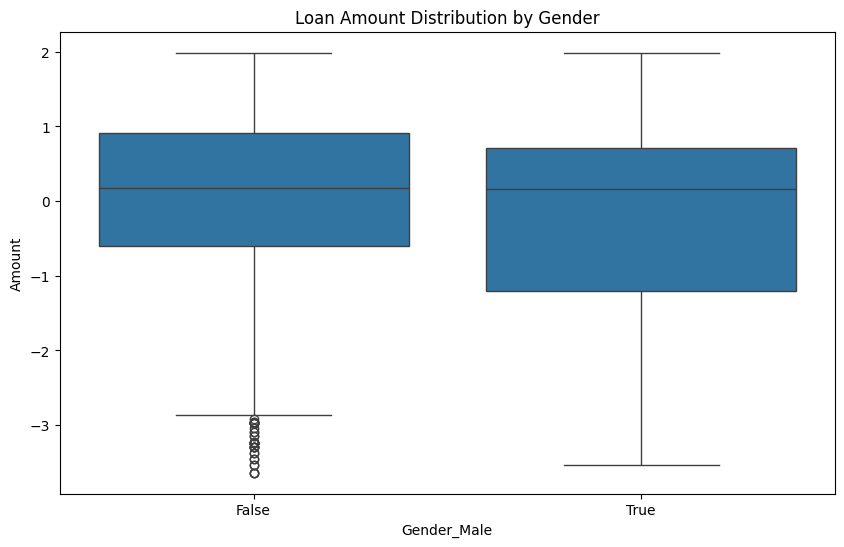

In [ ]:
# Checking the distribution of loan amounts by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender_Male', y='Amount', data=data)
plt.title('Loan Amount Distribution by Gender')
plt.show()

In [ ]:
from scipy.stats import ttest_ind
# Statistical test to compare loan amounts between males and females
male_amounts = data[data['Gender_Male'] == 1]['Amount']
female_amounts = data[data['Gender_Male'] == 0]['Amount']

# Perform t-test
t_stat, p_value = ttest_ind(male_amounts, female_amounts, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference in loan amounts between males and females.")
else:
    print("No statistically significant difference in loan amounts between males and females.")

T-statistic: -19.394670131986214, P-value: 3.278113293366748e-83
There is a statistically significant difference in loan amounts between males and females.


In [ ]:
# Compute correlation matrix for all numeric features
corr_matrix = data.corr(numeric_only=True).abs()

# Create a mask to ignore self-correlations (diagonal = 1)
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find feature pairs with high correlation (> 0.8)
high_corr_pairs = upper_triangle.stack().reset_index()
high_corr_pairs.columns = ["Feature_1", "Feature_2", "Correlation"]
high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"] > 0.8]

# Sort by correlation descending
high_corr_pairs = high_corr_pairs.sort_values(by="Correlation", ascending=False)

# Show top correlated pairs
print("Highly correlated feature pairs (|r| > 0.8):")
display(high_corr_pairs)


Highly correlated feature pairs (|r| > 0.8):


,Feature_1,Feature_2,Correlation
1804,MaritalStatus_Not_specified,UseOfLoan_Not_set,1.000000
1785,MaritalStatus_Not_specified,OccupationArea_Not_specified,0.998636
2393,OccupationArea_Not_specified,UseOfLoan_Not_set,0.998636
1958,EmploymentStatus_Not_specified,UseOfLoan_Not_set,0.997273
1770,MaritalStatus_Not_specified,EmploymentStatus_Not_specified,0.997273
1939,EmploymentStatus_Not_specified,OccupationArea_Not_specified,0.995983
671,FreeCash,UseOfLoan_Not_set,0.935099
633,FreeCash,MaritalStatus_Not_specified,0.935099
652,FreeCash,OccupationArea_Not_specified,0.933983
637,FreeCash,EmploymentStatus_Not_specified,0.933925


In [ ]:
columns_to_drop = [
    'MaritalStatus_Not_specified',
    'OccupationArea_Not_specified',
    'EmploymentStatus_Not_specified',
    'UseOfLoan_Not_set',
    'EmploymentStatus_Fully'
]
data = data.drop(columns=columns_to_drop)

print(f"Data size after cleaning: {data.shape[0]} rows")

Data size after cleaning: 56685 rows


In [ ]:
gen = ['Gender_Male']
pd.value_counts(data[gen].values.flatten())

/tmp/ipython-input-2669397324.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data[gen].values.flatten())


,count
True,42118
False,14567


### **Model Training - XGBoost Regressor, Random Forest Regressor, Lasso Regression**

Handling data leakage

Several features were flagged and removed due to their potential to introduce data leakage. These included Interest, MonthlyPayment, Rating, and Restructured_Yes, all of which are determined post-approval and thus would not be available to a loan officer at the time of decision-making. Their inclusion would artificially inflate model performance and obscure the true predictive power of applicant features such as gender, income, and employment status. To preserve the integrity of the fairness analysis, these variables were excluded from the final modeling dataset.


The Restructured_Yes feature was removed to avoid potential data leakage. Loan restructuring is a post-disbursement event that may alter the loan’s payment terms or principal amount. Including such a feature could introduce outcome-dependent information into the model, thereby compromising the integrity of the fairness analysis focused on pre-approval factors.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(['Amount'], axis=1)
y = data['Amount']

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

Training Set Size: (45348, 67)
Test Set Size: (11337, 67)


In [ ]:

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse'),
    'Lasso': Lasso(alpha=0.1)
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    # Manually calculating RMSE for compatibility
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
    results[name] = {'R^2': r2, 'RMSE': rmse, 'CV Score': cv_score}
    print(f"{name} - R^2: {r2:.4f}, RMSE: {rmse:.4f}, CV Score: {cv_score:.4f}")

results_model_1 = results.copy()

# Display the results
print("\nModel Comparison:")
for model, metrics in results.items():
    print(f"{model}: R^2 = {metrics['R^2']:.4f}, RMSE = {metrics['RMSE']:.4f}, CV Score = {metrics['CV Score']:.4f}")

Training Random Forest...
Random Forest - R^2: 0.5042, RMSE: 0.7068, CV Score: 0.5030
Training XGBoost...
XGBoost - R^2: 0.5318, RMSE: 0.6868, CV Score: 0.5292
Training Lasso...
Lasso - R^2: 0.2291, RMSE: 0.8813, CV Score: 0.2258

Model Comparison:
Random Forest: R^2 = 0.5042, RMSE = 0.7068, CV Score = 0.5030
XGBoost: R^2 = 0.5318, RMSE = 0.6868, CV Score = 0.5292
Lasso: R^2 = 0.2291, RMSE = 0.8813, CV Score = 0.2258


xgboost is the best model, it has highest r2 indicating it explains the most variance and the lowest RMSE meaning the average prediction error is minimal and highest CV score

<Figure size 1000x800 with 0 Axes>

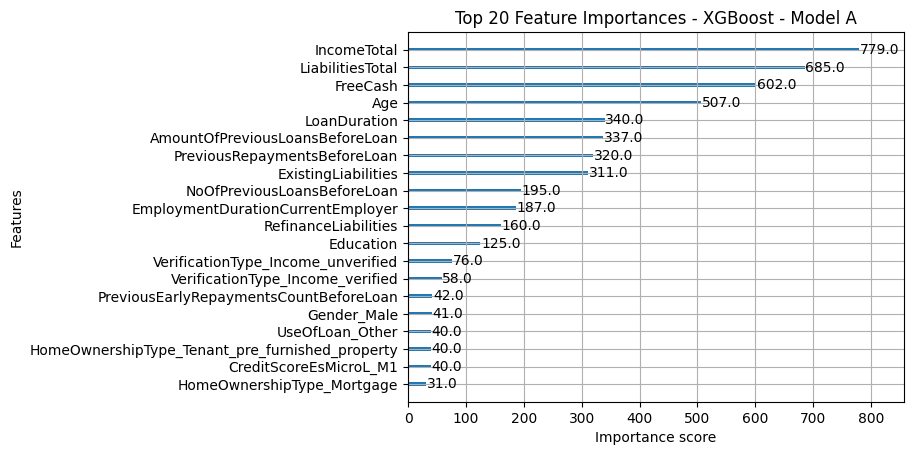

In [ ]:

import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plotting feature importance for the XGBoost model
plt.figure(figsize=(10, 8))
plot_importance(models['XGBoost'], importance_type='weight', max_num_features=20)
plt.title("Top 20 Feature Importances - XGBoost - Model A")
plt.show()

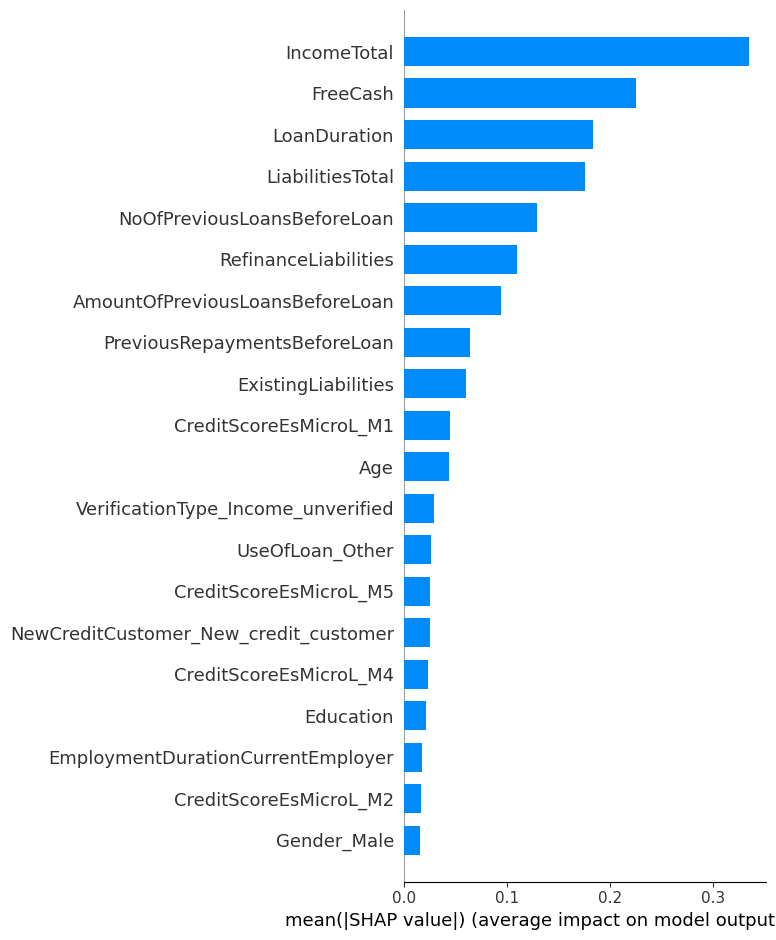

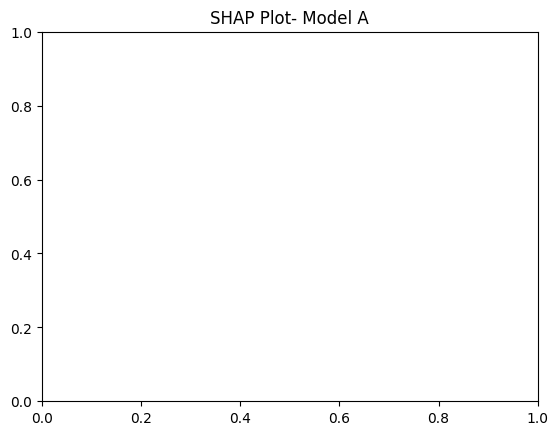

In [ ]:
# Model Interpretation with SHAP Values

import shap

# Initialize the SHAP explainer for the XGBoost model
explainer = shap.Explainer(models['XGBoost'])
shap_values = explainer(X_test)

# Plot SHAP summary plot to visualize global feature importance
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("SHAP Plot- Model A")
plt.show()


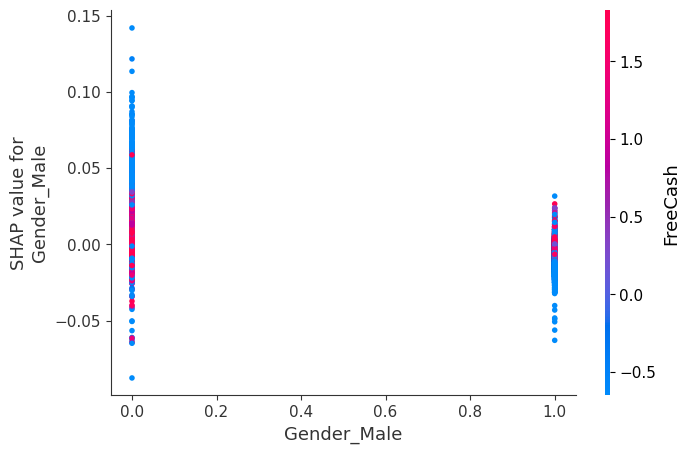

In [ ]:
# SHAP dependence plot for Gender
shap.dependence_plot("Gender_Male", shap_values.values, X_test)

In [ ]:
# average shap values by gender - Model 1


# Extract SHAP values for Gender_Male column
gender_shap_values1 = shap_values.values[:, X_test.columns.get_loc("Gender_Male")]

# Combine with gender labels from X_test
gender_df1 = X_test.copy()
gender_df1["Gender_SHAP"] = gender_shap_values1

# Compute average SHAP value for Gender_Male by actual gender
avg_shap_by_gender1 = gender_df1.groupby("Gender_Male")["Gender_SHAP"].mean()
avg_shap_by_gender1

,Gender_SHAP
Gender_Male,
False,0.028970
True,-0.009511


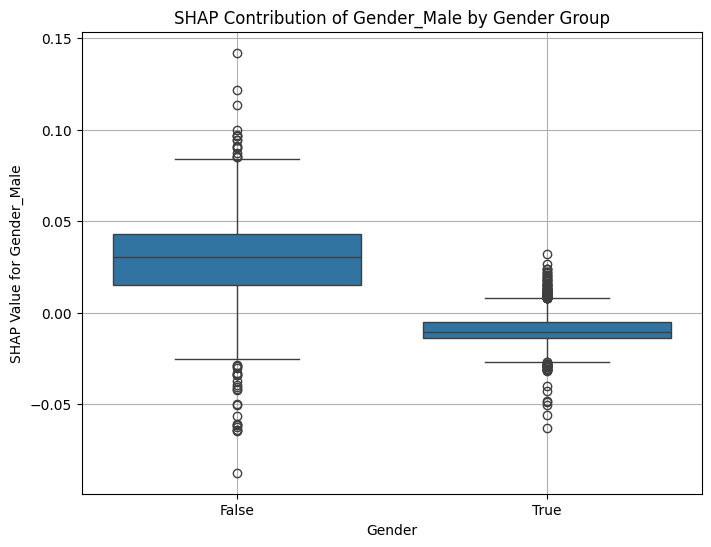

In [ ]:
# Boxplot of SHAP values by gender

import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with SHAP values and gender
gender_shap_df = X_test.copy()
gender_shap_df['Gender_SHAP'] = shap_values.values[:, X_test.columns.get_loc("Gender_Male")]
gender_shap_df['Gender'] = gender_shap_df['Gender_Male'].map({0: 'Female', 1: 'Male'})

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender_Male', y='Gender_SHAP', data=gender_shap_df)
plt.title('SHAP Contribution of Gender_Male by Gender Group')
plt.ylabel('SHAP Value for Gender_Male')
plt.xlabel('Gender')
plt.grid(True)
plt.show()

In [ ]:
X_train['Gender_Male'].value_counts()
#X_test['Gender_Male'].value_counts()

,count
Gender_Male,
True,33658
False,11690


## **Balancing Gender with Undersampling**

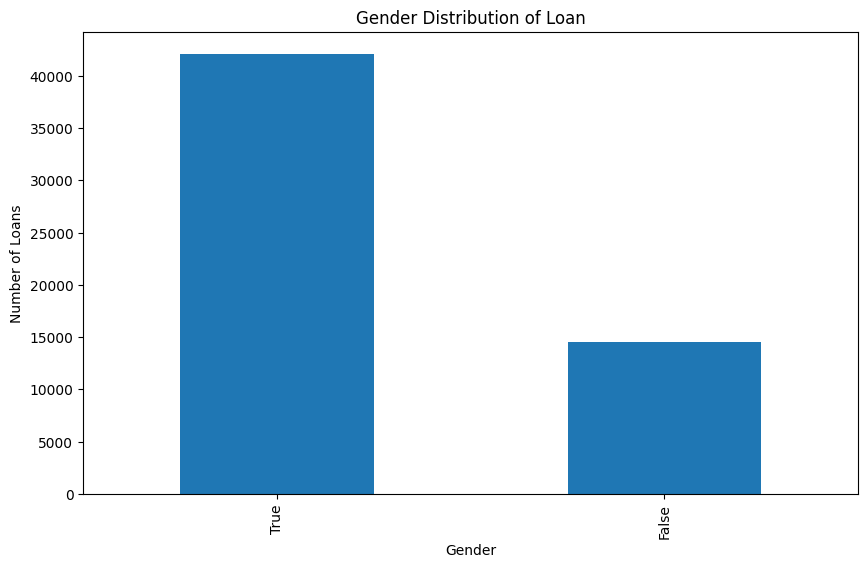

In [ ]:

plt.figure(figsize=(10, 6))
data['Gender_Male'].value_counts().plot(kind='bar')
plt.title('Gender Distribution of Loan')
plt.xlabel('Gender')
plt.ylabel('Number of Loans')
plt.show()

Model 2 — Gender-Balanced (Undersampling) using TRAIN ONLY
Training Set Size: (23380, 67)
Test Set Size (unchanged): (11337, 67)


/tmp/ipython-input-1194873521.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Female','Male'], y=gender_counts_train.values, palette='muted')


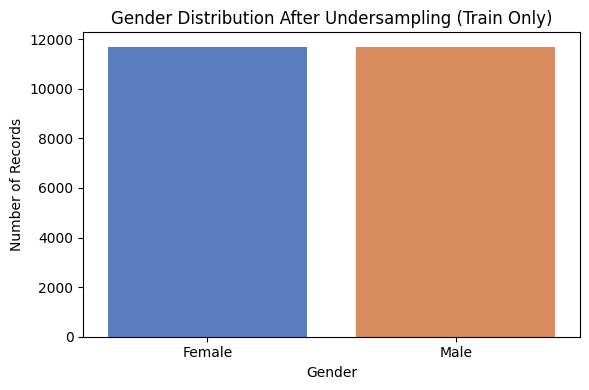

In [ ]:
# =========================
# Model 2 — Undersampled (TRAIN ONLY), split-first, no leakage


TARGET_COL = "Amount"
PROTECTED_COL = "Gender_Male"  # 1=Male, 0=Female

# --- 1) Split FIRST from the same base `data` used in Model 1
X_all = data.drop(columns=[TARGET_COL])
y_all = data[TARGET_COL]

X2_train_base, X2_test, y2_train_base, y2_test = train_test_split(
    X_all, y_all, test_size=0.20, random_state=42
)

# --- 2) Undersample MALES in TRAIN ONLY to match FEMALE count
train_tmp = X2_train_base.copy()
train_tmp[TARGET_COL] = y2_train_base.values

male_idx   = train_tmp.index[train_tmp[PROTECTED_COL] == 1]
female_idx = train_tmp.index[train_tmp[PROTECTED_COL] == 0]

n_female = len(female_idx)
male_keep = pd.Series(male_idx).sample(n=n_female, random_state=42).values

keep_idx = np.concatenate([male_keep, female_idx])
train_bal = train_tmp.loc[keep_idx].sample(frac=1, random_state=42)  # shuffle

# --- 3) Final TRAIN split (features/target)
X2_train = train_bal.drop(columns=[TARGET_COL])
y2_train = train_bal[TARGET_COL]

# --- 4) Ensure no object dtypes for XGB/Lasso
def encode_objects_as_codes(train_df: pd.DataFrame, test_df: pd.DataFrame):
    train = train_df.copy(); test = test_df.copy()
    obj_cols = train.select_dtypes(include=['object']).columns.tolist()
    for col in obj_cols:
        cats = pd.Categorical(train[col]).categories
        train[col] = pd.Categorical(train[col], categories=cats).codes.astype('int32')
        test[col]  = pd.Categorical(test[col],  categories=cats).codes.astype('int32')
    return train, test, obj_cols

X2_train, X2_test, converted_obj_cols_2 = encode_objects_as_codes(X2_train, X2_test)
if converted_obj_cols_2:
    print("Converted object columns to codes (Model 2):", converted_obj_cols_2)

# --- 5) QC: sizes (test set matches Model 1, and gender balance (TRAIN ONLY)
print("Model 2 — Gender-Balanced (Undersampling) using TRAIN ONLY")
print("Training Set Size:", X2_train.shape)
print("Test Set Size (unchanged):", X2_test.shape)

gender_counts_train = X2_train[PROTECTED_COL].value_counts().sort_index()  # 0: Female, 1: Male
plt.figure(figsize=(6, 4))
sns.barplot(x=['Female','Male'], y=gender_counts_train.values, palette='muted')
plt.title("Gender Distribution After Undersampling (Train Only)")
plt.ylabel("Number of Records")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()



In [ ]:
# ---Train & evaluate model B
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse'),
    'Lasso': Lasso(alpha=0.1, random_state=42)
}

results = {}
xgb_model_2 = None

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X2_train, y2_train)

    if name == 'XGBoost':
        xgb_model_2 = model  # Save trained XGBoost model

    # Test
    test_pred = model.predict(X2_test)
    test_r2 = r2_score(y2_test, test_pred)
    test_rmse = mean_squared_error(y2_test, test_pred) ** 0.5

    # Cross-validation on the (undersampled) TRAIN set
    cv_score = cross_val_score(model, X2_train, y2_train, cv=5, scoring='r2').mean()

    results[name] = {
        'Test R^2': test_r2,
        'Test RMSE': test_rmse,
        'CV Score': cv_score
    }

results_model_2 = results.copy()

# --- Print results
print("\nModel 2 — Gender-Balanced (Undersampling) Model Comparison:")
for name, scores in results_model_2.items():
    print(f"{name}:")
    print(f"  Test R^2        = {scores['Test R^2']:.4f}")
    print(f"  Test RMSE       = {scores['Test RMSE']:.4f}")
    print(f"  Cross-Val R^2   = {scores['CV Score']:.4f}\n")


Training Random Forest...

Training XGBoost...

Training Lasso...

Model 2 — Gender-Balanced (Undersampling) Model Comparison:
Random Forest:
  Test R^2        = 0.4739
  Test RMSE       = 0.7280
  Cross-Val R^2   = 0.4696

XGBoost:
  Test R^2        = 0.5066
  Test RMSE       = 0.7051
  Cross-Val R^2   = 0.5082

Lasso:
  Test R^2        = 0.2305
  Test RMSE       = 0.8805
  Cross-Val R^2   = 0.2371



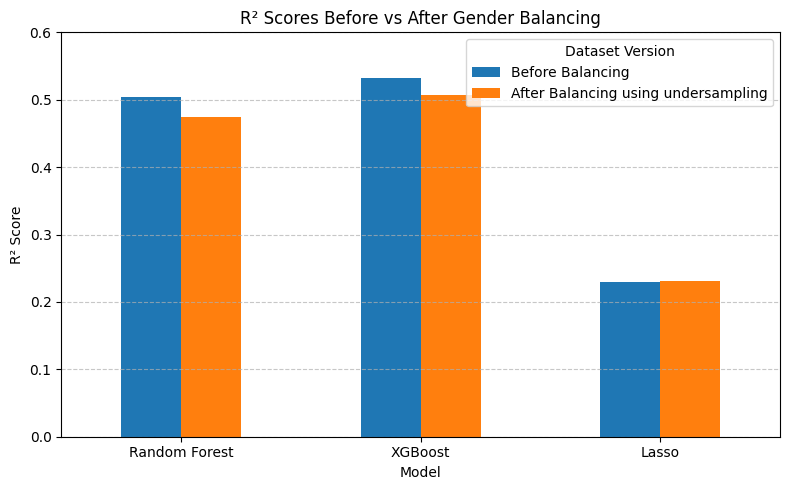

In [ ]:
# compare results of two models (before and after balancing gender)


models = list(results_model_1.keys())

r2_scores = {
    'Model': models,
    'Before Balancing': [results_model_1[m]['R^2'] for m in models],
    'After Balancing using undersampling': [results_model_2[m]['Test R^2'] for m in models]
}

df_r2 = pd.DataFrame(r2_scores).set_index('Model')

# Plot
ax = df_r2.plot(kind='bar', figsize=(8, 5))
plt.title('R² Scores Before vs After Gender Balancing')
plt.ylabel('R² Score')
plt.ylim(0, 0.6)
plt.xticks(rotation=0)
plt.legend(title='Dataset Version', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

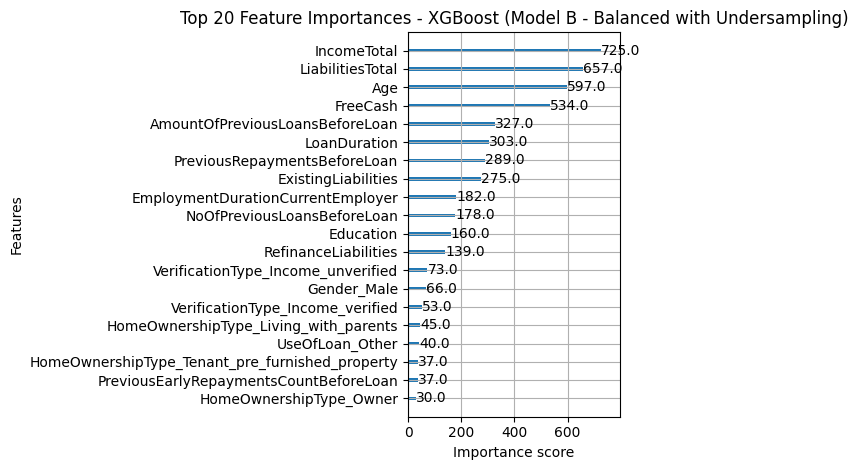

In [ ]:
# Plotting feature importance for the XGBoost model from Model 2 (gender-balanced)
plt.figure(figsize=(10, 8))
plot_importance(xgb_model_2, importance_type='weight', max_num_features=20)
plt.title("Top 20 Feature Importances - XGBoost (Model B - Balanced with Undersampling)")
plt.tight_layout()
plt.show()

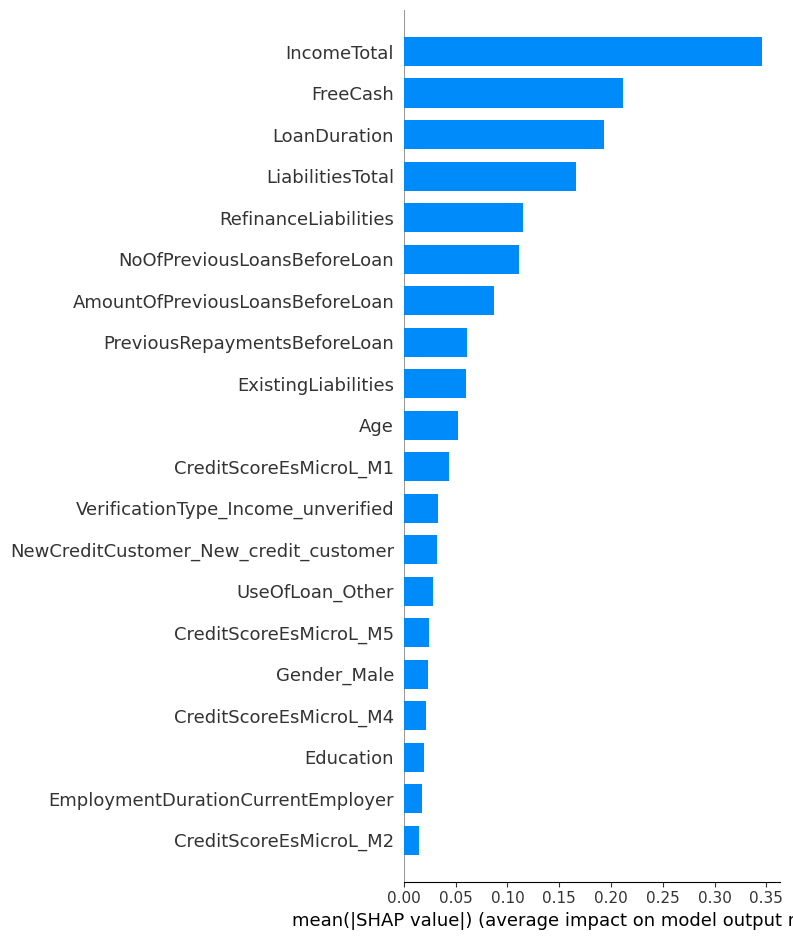

In [ ]:
# Model Interpretation with SHAP Values


import shap

# Initialize the SHAP explainer for the XGBoost model
explainer = shap.Explainer(xgb_model_2)
shap_values = explainer(X_test)

# Plot SHAP summary plot to visualize global feature importance
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()

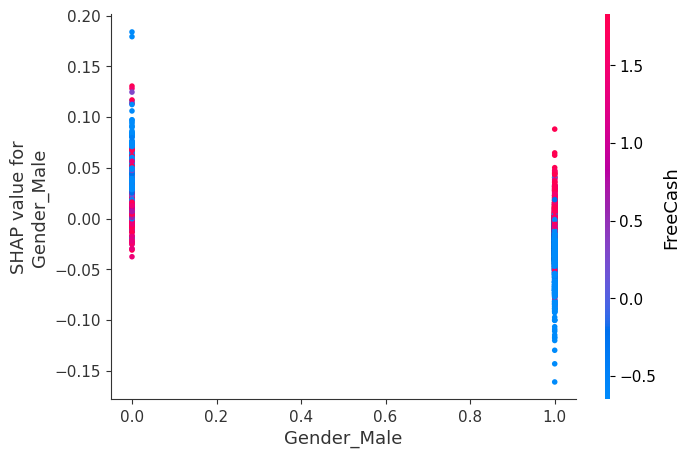

In [ ]:
shap.dependence_plot("Gender_Male", shap_values.values, X_test)


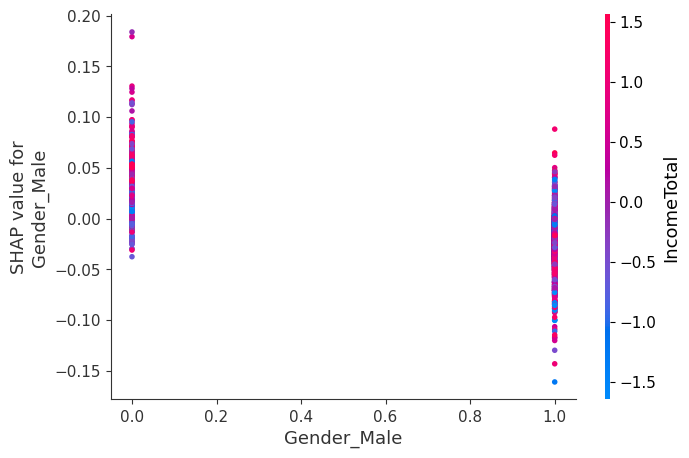

In [ ]:
# Dependence plot colored by a specific interaction feature (e.g. IncomeTotal)
shap.dependence_plot("Gender_Male", shap_values.values, X_test, interaction_index="IncomeTotal")

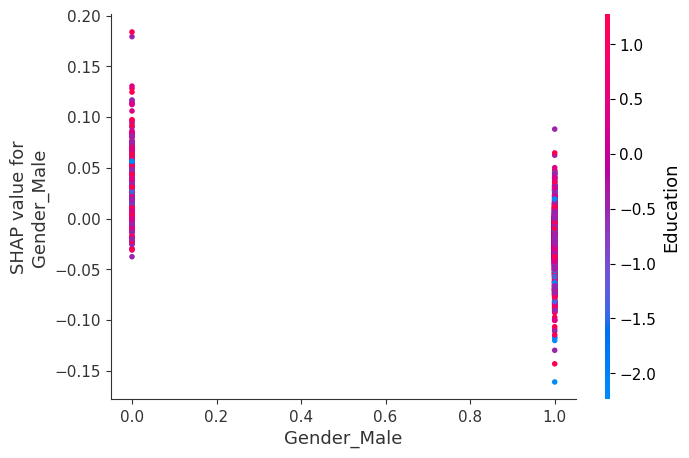

In [ ]:
# Dependence plot colored by a specific interaction feature
shap.dependence_plot("Gender_Male", shap_values.values, X_test, interaction_index="Education")

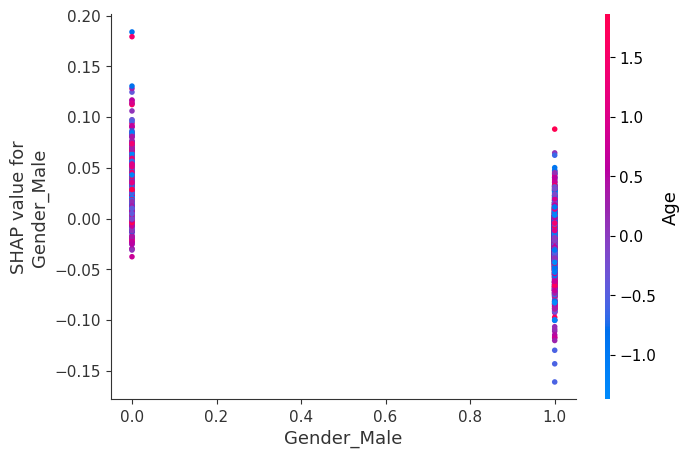

In [ ]:
# Dependence plot colored by a specific interaction feature
shap.dependence_plot("Gender_Male", shap_values.values, X_test, interaction_index="Age")

In [ ]:
# average shap values by gender


# Extract SHAP values for Gender_Male column
gender_shap_values = shap_values.values[:, X_test.columns.get_loc("Gender_Male")]

# Combine with gender labels from X_test
gender_df = X_test.copy()
gender_df["Gender_SHAP"] = gender_shap_values

# Compute average SHAP value for Gender_Male by actual gender
avg_shap_by_gender = gender_df.groupby("Gender_Male")["Gender_SHAP"].mean()
avg_shap_by_gender

,Gender_SHAP
Gender_Male,
False,0.025573
True,-0.021554


In [ ]:
# Re-initialize SHAP explainer on the correct model
explainer = shap.Explainer(xgb_model_2)

# Generate SHAP values only for the test set (X2_test)
shap_values = explainer(X2_test)

# Now extract the correct SHAP values for Gender_Male
shap_gender = shap_values.values[:, X2_test.columns.get_loc('Gender_Male')]

# Now both SHAP and Gender arrays should match in length
gender_col = X2_test['Gender_Male'].values

print("SHAP shape:", shap_gender.shape)
print("Gender shape:", gender_col.shape)


SHAP shape: (11337,)
Gender shape: (11337,)


In [ ]:
# # Create DataFrame
# shap_df_balanced = pd.DataFrame({
#     'SHAP_Gender_Male': shap_gender,
#     'Gender': gender_col
# })
# shap_df_balanced['Gender'] = shap_df_balanced['Gender'].map({1: 'Male', 0: 'Female'})

# # Plot
# plt.figure(figsize=(8, 6))
# sns.boxplot(x='Gender', y='SHAP_Gender_Male', data=shap_df_balanced)
# plt.title('SHAP Contribution of Gender_Male by Gender Group (Balanced Data)')
# plt.ylabel('SHAP Value for Gender_Male')
# plt.xlabel('Gender')
# plt.grid(True)
# plt.show()


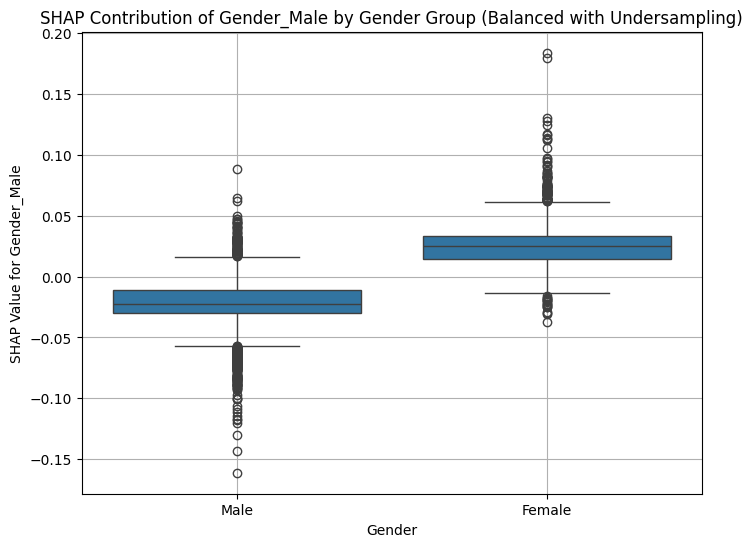

In [ ]:
# Step 1: Generate SHAP values
explainer = shap.Explainer(xgb_model_2)
shap_values = explainer(X2_test)

# Step 2: Extract SHAP values for Gender_Male
shap_gender = shap_values.values[:, X2_test.columns.get_loc('Gender_Male')]
gender_col = X2_test['Gender_Male'].values

# Step 3: Convert both to NumPy arrays and ensure finite values
mask = np.isfinite(shap_gender) & np.isfinite(gender_col)

# Step 4: Build DataFrame with cleaned values
shap_df_balanced = pd.DataFrame({
    'SHAP_Gender_Male': shap_gender[mask],
    'Gender_Male': gender_col[mask]
})
shap_df_balanced['Gender'] = shap_df_balanced['Gender_Male'].map({True: 'Male', False: 'Female'})


# Step 5: Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='SHAP_Gender_Male', data=shap_df_balanced)
plt.title('SHAP Contribution of Gender_Male by Gender Group (Balanced with Undersampling)')
plt.ylabel('SHAP Value for Gender_Male')
plt.xlabel('Gender')
plt.grid(True)
plt.show()



## **Balancing Gender with Oversampling**

In [ ]:
# ---------- 0) Helpers
def encode_objects_as_codes(train_df: pd.DataFrame, test_df: pd.DataFrame):
    """
    Convert object columns to categorical codes using TRAIN categories only (no leakage).
    Unseen categories in TEST map to -1.
    """
    train = train_df.copy()
    test = test_df.copy()

    obj_cols = train.select_dtypes(include=['object']).columns.tolist()
    for col in obj_cols:
        cats = pd.Categorical(train[col]).categories
        train[col] = pd.Categorical(train[col], categories=cats).codes.astype('int32')
        test[col]  = pd.Categorical(test[col],  categories=cats).codes.astype('int32')
        # unseen becomes -1 automatically

    return train, test, obj_cols

def detect_binary_or_small_int(df: pd.DataFrame, exclude_cols=None, max_card=10):
    exclude_cols = set(exclude_cols or [])
    cat_idx = []
    for i, col in enumerate(df.columns):
        if col in exclude_cols:
            continue
        s = df[col]
        if set(pd.unique(s.dropna())).issubset({0, 1}):
            cat_idx.append(i)
        elif np.issubdtype(s.dtype, np.integer) and s.nunique(dropna=True) <= max_card:
            cat_idx.append(i)
    return cat_idx

In [ ]:
from imblearn.over_sampling import SMOTENC

# Copy dataset
data3 = data.copy()

# Define features and target
TARGET_COL = "Amount"
PROTECTED_COL = "Gender_Male"
X_full = data3.drop(columns=[TARGET_COL])
y_full = data3[TARGET_COL]

# Train-test split
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X_full, y_full, test_size=0.20, random_state=42
)

# Identify categorical (label-encoded) columns
categorical_feature_indices = [
    X3_train.columns.get_loc(col) for col in ["EmploymentDurationCurrentEmployer", "Education"]
]

# Build labels for oversampling (gender-based)
y_smote = X3_train[PROTECTED_COL].astype(int)

# Include target temporarily so it’s carried through resampling
X3_train_tmp = X3_train.copy()
X3_train_tmp["__Amount__"] = y3_train.values

#Define sampling strategy: balance females (0) up to males (1)
n_male = int((y_smote == 1).sum())
sampling_strategy = {0: n_male, 1: n_male}

# Oversample
smote_nc = SMOTENC(
    categorical_features=categorical_feature_indices,
    sampling_strategy=sampling_strategy,
    k_neighbors=5,
    random_state=42
)

# Perform oversampling on the TRAIN set only
X3_train_aug, y_smote_aug = smote_nc.fit_resample(X3_train_tmp, y_smote)

# Extract target back and clean X
y3_train_res = X3_train_aug.pop("__Amount__")
X3_train_res = X3_train_aug


/tmp/ipython-input-3334504392.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_labels, y=gender_counts_os.values, palette='muted')


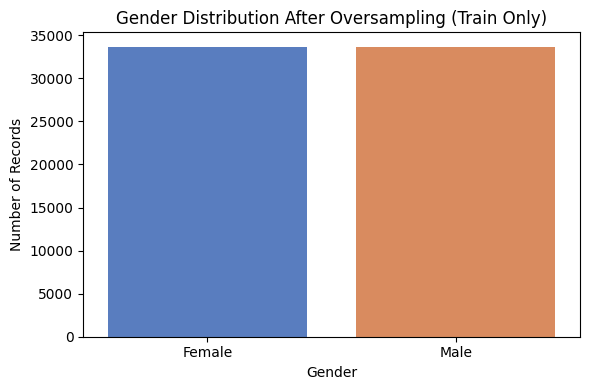

In [ ]:
# Plot gender distribution AFTER oversampling
gender_counts_os = X3_train_res[PROTECTED_COL].value_counts().sort_index()  # 0=Female, 1=Male
gender_labels = ['Female', 'Male']

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_labels, y=gender_counts_os.values, palette='muted')
plt.title("Gender Distribution After Oversampling (Train Only)")
plt.ylabel("Number of Records")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

In [ ]:
# Train/evaluate models
print("Model 3 — Gender-Oversampled (SMOTENC) Data")
print("Training Set Size (post-oversampling):", X3_train_res.shape)
print("Test Set Size (unchanged):", X3_test.shape)

Model 3 — Gender-Oversampled (SMOTENC) Data
Training Set Size (post-oversampling): (67316, 67)
Test Set Size (unchanged): (11337, 67)


In [ ]:
def encode_objects_as_codes(train_df: pd.DataFrame, test_df: pd.DataFrame):
    train = train_df.copy()
    test = test_df.copy()

    obj_cols = train.select_dtypes(include=['object']).columns.tolist()
    if obj_cols:
        for col in obj_cols:
            # Build categories from TRAIN only (avoid leakage)
            cats = pd.Categorical(train[col]).categories
            # Cast to categorical with fixed train categories
            train[col] = pd.Categorical(train[col], categories=cats)
            test[col]  = pd.Categorical(test[col],  categories=cats)

            # Convert to integer codes; unseen in test -> becomes -1
            train[col] = train[col].cat.codes.astype('int32')
            test[col]  = test[col].cat.codes.astype('int32').replace(-1, -1)

    # Also coerce any numeric-looking strings to numbers
    for df in (train, test):
        for c in df.columns:
            if df[c].dtype == 'object':
                # Try numeric coercion if any object remains
                df[c] = pd.to_numeric(df[c], errors='ignore')

    return train, test, obj_cols

X3_train_res, X3_test, converted_obj_cols = encode_objects_as_codes(X3_train_res, X3_test)

if converted_obj_cols:
    print("Converted object columns to category codes:", converted_obj_cols)

# Ensure target is numeric
y3_train_res = pd.to_numeric(y3_train_res, errors='raise')
y3_test      = pd.to_numeric(y3_test, errors='raise')

In [ ]:

models_m3 = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse'),
    'Lasso': Lasso(alpha=0.1, random_state=42)
}

results_model_3 = {}
xgb_model_3 = None  # placeholder to store trained XGB model

for name, model in models_m3.items():
    print(f"\nTraining {name}...")
    model.fit(X3_train_res, y3_train_res)

    if name == 'XGBoost':
        xgb_model_3 = model

    # Evaluate on the untouched test set
    test_pred = model.predict(X3_test)
    test_r2 = r2_score(y3_test, test_pred)
    test_rmse = mean_squared_error(y3_test, test_pred) ** 0.5

    # Cross-validation on the oversampled train set
    cv_score = cross_val_score(model, X3_train_res, y3_train_res, cv=5, scoring='r2').mean()

    results_model_3[name] = {
        'Test R^2': test_r2,
        'Test RMSE': test_rmse,
        'CV Score': cv_score
    }

# Print results
print("\nModel 3 — Gender-Oversampled (SMOTENC) Model Comparison:")
for name, scores in results_model_3.items():
    print(f"{name}:")
    print(f"  Test R^2        = {scores['Test R^2']:.4f}")
    print(f"  Test RMSE       = {scores['Test RMSE']:.4f}")
    print(f"  Cross-Val R^2   = {scores['CV Score']:.4f}\n")


Training Random Forest...

Training XGBoost...

Training Lasso...

Model 3 — Gender-Oversampled (SMOTENC) Model Comparison:
Random Forest:
  Test R^2        = 0.4976
  Test RMSE       = 0.7115
  Cross-Val R^2   = 0.6027

XGBoost:
  Test R^2        = 0.5327
  Test RMSE       = 0.6862
  Cross-Val R^2   = 0.5690

Lasso:
  Test R^2        = 0.2308
  Test RMSE       = 0.8803
  Cross-Val R^2   = 0.2405



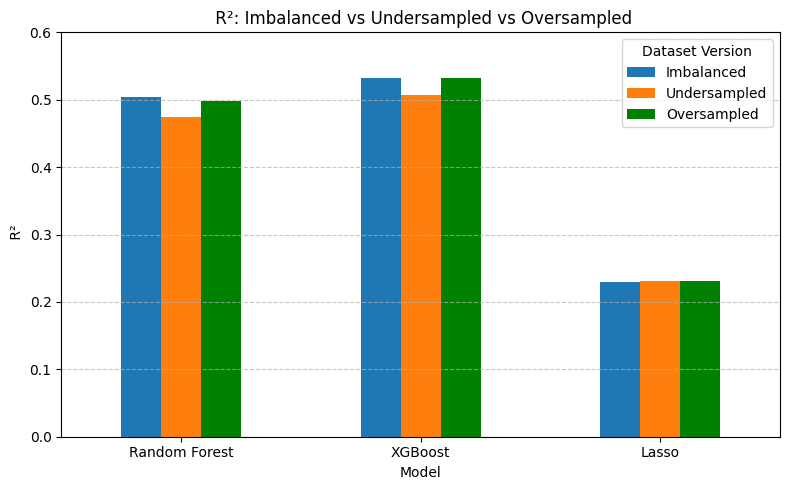

In [ ]:
# compare results of three baseline models (before and after balancing gender)

# --- Build R² comparison for all three
models = list(results_model_1.keys())

cv_scores = {
    'Model': models,
    'Imbalanced':   [results_model_1[m]['R^2'] if 'R^2' in results_model_1[m] else results_model_1[m]['R^2'] for m in models],
    'Undersampled': [results_model_2[m]['Test R^2'] for m in models],
    'Oversampled':  [results_model_3[m]['Test R^2'] for m in models],
}

df_cv = pd.DataFrame(cv_scores).set_index('Model')

# --- Plot with custom colors
ax = df_cv.plot(
    kind='bar',
    figsize=(8, 5),
    color=['#1f77b4', '#ff7f0e', 'green']  # blue, orange, green
)
plt.title(' R²: Imbalanced vs Undersampled vs Oversampled')
plt.ylabel(' R²')
plt.ylim(0, 0.6)
plt.xticks(rotation=0)
plt.legend(title='Dataset Version', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

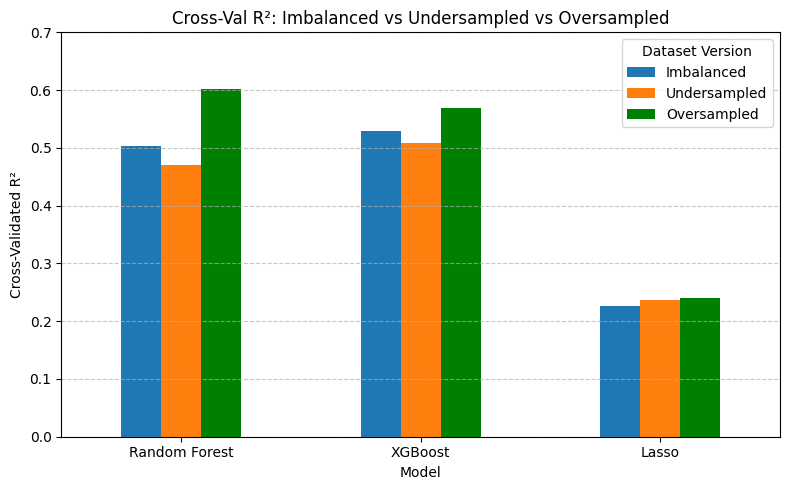

In [ ]:
# --- Build CV R² comparison for all three
models = list(results_model_1.keys())

cv_scores = {
    'Model': models,
    'Imbalanced':   [results_model_1[m]['CV Score'] if 'CV Score' in results_model_1[m] else results_model_1[m]['CV'] for m in models],
    'Undersampled': [results_model_2[m]['CV Score'] for m in models],
    'Oversampled':  [results_model_3[m]['CV Score'] for m in models],
}

df_cv = pd.DataFrame(cv_scores).set_index('Model')

# --- Plot with custom colors
ax = df_cv.plot(
    kind='bar',
    figsize=(8, 5),
    color=['#1f77b4', '#ff7f0e', 'green']  # blue, orange, green
)
plt.title('Cross-Val R²: Imbalanced vs Undersampled vs Oversampled')
plt.ylabel('Cross-Validated R²')
plt.ylim(0, 0.7)   # adjust if needed
plt.xticks(rotation=0)
plt.legend(title='Dataset Version', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

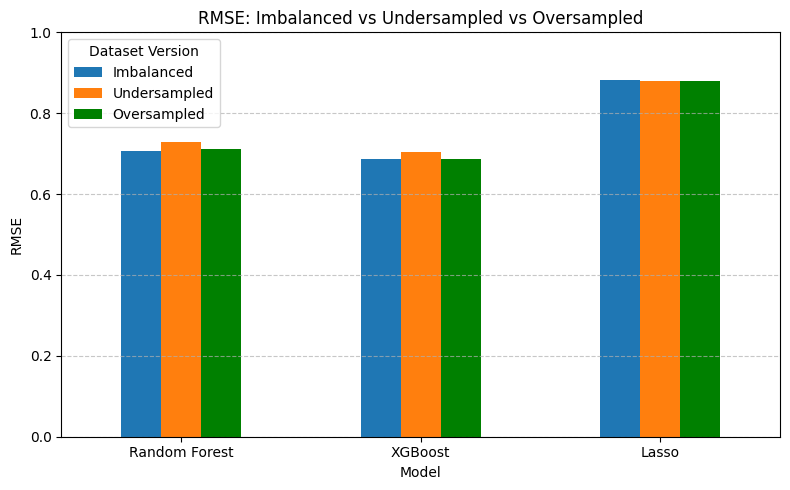

In [ ]:
# --- Build RMSE comparison for all three
models = list(results_model_1.keys())

scores = {
    'Model': models,
    'Imbalanced':   [results_model_1[m]['RMSE'] if 'RMSE' in results_model_1[m] else results_model_1[m]['RMSE'] for m in models],
    'Undersampled': [results_model_2[m]['Test RMSE'] for m in models],
    'Oversampled':  [results_model_3[m]['Test RMSE'] for m in models],
}

df_cv = pd.DataFrame(scores).set_index('Model')

# --- Plot with custom colors
ax = df_cv.plot(
    kind='bar',
    figsize=(8, 5),
    color=['#1f77b4', '#ff7f0e', 'green']  # blue, orange, green
)
plt.title('RMSE: Imbalanced vs Undersampled vs Oversampled')
plt.ylabel('RMSE')
plt.ylim(0, 1)   # adjust if needed
plt.xticks(rotation=0)
plt.legend(title='Dataset Version', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

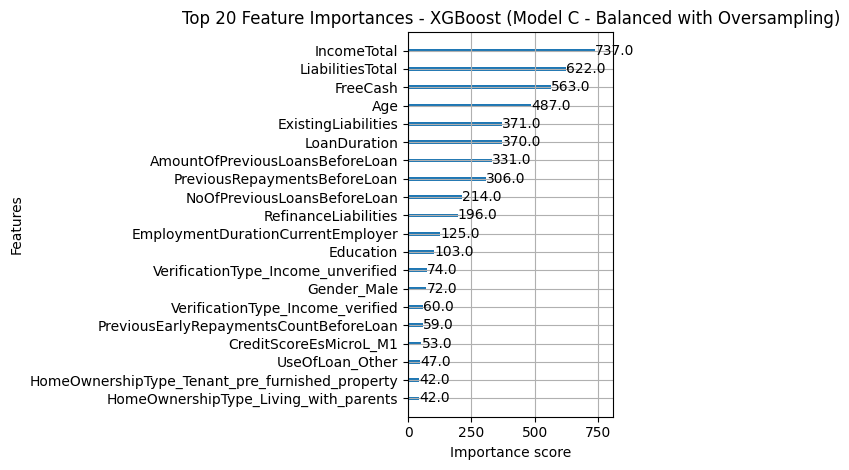

In [ ]:
# Plotting feature importance for the XGBoost model from Model 3 (gender-balanced with oversampling)
plt.figure(figsize=(10, 8))
plot_importance(xgb_model_3, importance_type='weight', max_num_features=20)
plt.title("Top 20 Feature Importances - XGBoost (Model C - Balanced with Oversampling)")
plt.tight_layout()
plt.show()

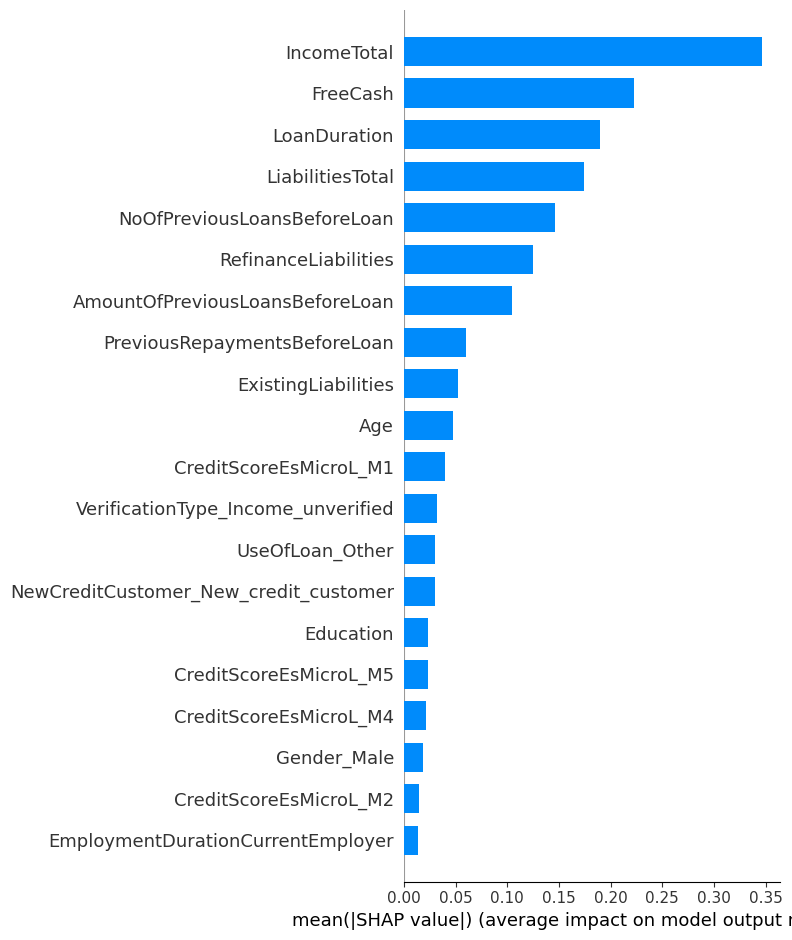

In [ ]:
# Model Interpretation with SHAP Values


import shap

# Initialize the SHAP explainer for the XGBoost model
explainer = shap.Explainer(xgb_model_3)
shap_values = explainer(X3_test)

# Plot SHAP summary plot to visualize global feature importance
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X3_test, plot_type="bar")
plt.show()

In [ ]:
# Extract SHAP values for the Gender_Male column (Model 3)
gender_shap_values_m3 = shap_values.values[:, X3_test.columns.get_loc("Gender_Male")]

# Combine with the test set
gender_df_m3 = X3_test.copy()
gender_df_m3["Gender_SHAP"] = gender_shap_values_m3

# Compute average SHAP value for Gender_Male by actual gender label
avg_shap_by_gender_m3 = gender_df_m3.groupby("Gender_Male")["Gender_SHAP"].mean()
print("Average SHAP values for Gender_Male (Model 3 - Oversampled):")
print(avg_shap_by_gender_m3)

Average SHAP values for Gender_Male (Model 3 - Oversampled):
Gender_Male
False    0.021548
True    -0.015888
Name: Gender_SHAP, dtype: float32


## Fairness Evaluation

In [ ]:
# Fairness metrics for regression-based predictions

# ===== Train XGBoost models separately and save =====
xgb_model_1 = XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse')
xgb_model_1.fit(X_train, y_train)

xgb_model_2 = XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse')
xgb_model_2.fit(X2_train, y2_train)

xgb_model_3 = XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse')
xgb_model_3.fit(X3_train, y3_train)

# ===== Predictions =====
pred1 = xgb_model_1.predict(X_test)
pred2 = xgb_model_2.predict(X2_test)
pred3 = xgb_model_3.predict(X3_test)

# ===== Gender values from test sets =====
gender_test_1 = X_test['Gender_Male'].values
gender_test_2 = X2_test['Gender_Male'].values
gender_test_3 = X3_test['Gender_Male'].values

# ===== True y values =====
y1_true = y_test
y2_true = y2_test
y3_true = y3_test

# ===== Define regression fairness metrics =====
def mean_residual_difference(y_true, y_pred, gender):
    residuals = y_true - y_pred
    return np.mean(residuals[gender == 0]) - np.mean(residuals[gender == 1])

def group_rmse(y_true, y_pred, gender):
    rmse_male = np.sqrt(np.mean((y_true[gender == 1] - y_pred[gender == 1]) ** 2))
    rmse_female = np.sqrt(np.mean((y_true[gender == 0] - y_pred[gender == 0]) ** 2))
    return rmse_female, rmse_male

def between_group_variance(y_pred, gender):
    group_means = [np.mean(y_pred[gender == g]) for g in [0, 1]]
    return np.var(group_means)

# ===== Compute Fairness Metrics =====
res_diff_1 = mean_residual_difference(y1_true, pred1, gender_test_1)
rmse_female_1, rmse_male_1 = group_rmse(y1_true, pred1, gender_test_1)
var_between_1 = between_group_variance(pred1, gender_test_1)

res_diff_2 = mean_residual_difference(y2_true, pred2, gender_test_2)
rmse_female_2, rmse_male_2 = group_rmse(y2_true, pred2, gender_test_2)
var_between_2 = between_group_variance(pred2, gender_test_2)

res_diff_3 = mean_residual_difference(y3_true, pred3, gender_test_3)
rmse_female_3, rmse_male_3 = group_rmse(y3_true, pred3, gender_test_3)
var_between_3 = between_group_variance(pred3, gender_test_3)

# ===== Organize into DataFrame =====
regression_fairness_df = pd.DataFrame({
    "Mean Residual Diff (F-M)": [res_diff_1, res_diff_2, res_diff_3],
    "RMSE (Female)": [rmse_female_1, rmse_female_2, rmse_female_3],
    "RMSE (Male)": [rmse_male_1, rmse_male_2, rmse_male_3],
    "Between-Group Variance": [var_between_1, var_between_2, var_between_3]
}, index=["Model A (Unbalanced)", "Model B (Balanced with Undersampling)", "Model C (Balanced with Oversampling)"])

# ===== Display =====
print(regression_fairness_df)

                                       Mean Residual Diff (F-M)  \
Model A (Unbalanced)                                  -0.002485   
Model B (Balanced with Undersampling)                 -0.002194   
Model C (Balanced with Oversampling)                  -0.002485   

                                       RMSE (Female)  RMSE (Male)  \
Model A (Unbalanced)                        0.644128     0.700764   
Model B (Balanced with Undersampling)       0.651859     0.722260   
Model C (Balanced with Oversampling)        0.644128     0.700764   

                                       Between-Group Variance  
Model A (Unbalanced)                                 0.007062  
Model B (Balanced with Undersampling)                0.007037  
Model C (Balanced with Oversampling)                 0.007062  


In [ ]:
#  re-evaluate gender fairness before vs. after balancing using these metrics:
# - SHAP mean residual values
# - Residual gap (F - M)
# - RMSE by gender
# - Gender feature importance ranking in SHAP

# Define RMSE and residual gap functions again
def mean_residual_difference(y_true, y_pred, gender):
    residuals = y_true - y_pred
    return np.mean(residuals[gender == 0]) - np.mean(residuals[gender == 1])

def group_rmse(y_true, y_pred, gender):
    rmse_male = np.sqrt(np.mean((y_true[gender == 1] - y_pred[gender == 1]) ** 2))
    rmse_female = np.sqrt(np.mean((y_true[gender == 0] - y_pred[gender == 0]) ** 2))
    return rmse_female, rmse_male

# Compute metrics
results = []

# Baseline (Unbalanced) Model
res_diff_1 = mean_residual_difference(y_test, pred1, X_test['Gender_Male'])
rmse_f_1, rmse_m_1 = group_rmse(y_test, pred1, X_test['Gender_Male'])

results.append({
    "Model": "Model 1 (Unbalanced)",
    "Residual Gap (F-M)": res_diff_1,
    "RMSE Female": rmse_f_1,
    "RMSE Male": rmse_m_1
})

# Gender-Balanced Model
res_diff_2 = mean_residual_difference(y2_test, pred2, X2_test['Gender_Male'])
rmse_f_2, rmse_m_2 = group_rmse(y2_test, pred2, X2_test['Gender_Male'])

results.append({
    "Model": "Model 2 (Balanced and Undersampled)",
    "Residual Gap (F-M)": res_diff_2,
    "RMSE Female": rmse_f_2,
    "RMSE Male": rmse_m_2
})

fairness_compare_df = pd.DataFrame(results)


print(fairness_compare_df)


                                 Model  Residual Gap (F-M)  RMSE Female  \
0                 Model 1 (Unbalanced)           -0.002485     0.644128   
1  Model 2 (Balanced and Undersampled)           -0.002194     0.651859   

   RMSE Male  
0   0.700764  
1   0.722260  


## **Generative Adversarial Networks**

In [ ]:
main_data['Gender_Male'].value_counts()

,count
Gender_Male,
True,42118
False,14567


In [ ]:
columns_to_drop = [
    'MaritalStatus_Not_specified',
    'OccupationArea_Not_specified',
    'EmploymentStatus_Not_specified',
    'UseOfLoan_Not_set',
    'EmploymentStatus_Fully'
]
main_data2 = main_data.drop(columns=columns_to_drop)

print(f"Data size after cleaning: {data.shape[0]} rows")

Data size after cleaning: 56685 rows


In [ ]:
# Convert boolean to int

main_data2['Gender_Male'] = main_data2['Gender_Male'].astype(int)

# Then define the label column
label_cols = ['Gender_Male']

# Define feature columns (exclude Gender_Male)
data_cols = [col for col in main_data2.columns if col != 'Gender_Male']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# # Initialize scaler
# scaler = MinMaxScaler()

# # Fit and transform features
# main_data2[data_cols] = scaler.fit_transform(main_data2[data_cols])



scaler = MinMaxScaler(feature_range=(-1, 1))
main_data2[data_cols] = scaler.fit_transform(main_data2[data_cols])

In [ ]:
train = main_data2.reset_index(drop=True)

# All features, including label
# Used for conditioning and training discriminator
train_full = train[data_cols + label_cols]

# Features only (no label), used by generator
train_no_label = train[data_cols]

In [ ]:
#Check whether scaled training data is really distributed across [0, 1]

main_data2[data_cols].describe()

,Age,Amount,LoanDuration,Education,EmploymentDurationCurrentEmployer,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,FreeCash,...,HomeOwnershipType_Mortgage,HomeOwnershipType_Other,HomeOwnershipType_Owner,HomeOwnershipType_Owner_with_encumbrance,HomeOwnershipType_Tenant_pre_furnished_property,HomeOwnershipType_Tenant_unfurnished_property,UseOfLoan_Loan_consolidation,UseOfLoan_Other,UseOfLoan_Real_estate,UseOfLoan_Vehicle
count,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,...,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000
mean,-0.253654,0.293092,0.504835,0.275496,0.246477,-0.020308,-0.809257,-0.172752,-0.973351,-0.576901,...,-0.762195,-0.910876,-0.346988,-0.987510,-0.525024,-0.896304,-0.788480,-0.730969,-0.973856,-0.910558
std,0.419136,0.355783,0.517232,0.569595,0.593869,0.346191,0.199891,0.421069,0.101795,0.650183,...,0.647354,0.412684,0.937878,0.157558,0.851095,0.443444,0.615066,0.682416,0.227170,0.413384
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.593220,-0.064469,0.186441,0.000000,-0.428571,-0.262590,-0.944444,-0.224376,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-0.322034,0.356727,0.593220,0.000000,0.428571,-0.019927,-0.888889,-0.011352,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,0.050847,0.567314,1.000000,1.000000,0.714286,0.242161,-0.722222,0.100983,-1.000000,0.181248,...,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
## directory to save models

checkpoint_dir = "/content/drive/MyDrive/PHD in AI ML/Dissertation/Experiments/Models"


In [ ]:
## CUSTOM CGAN GENERATOR

from tensorflow.keras import layers, models, Input
from tensorflow.keras import backend as K

def build_generator(input_dim, label_dim, output_dim, base_units=128, noise_std=0.02):
    """
    input_dim: size of random noise vector
    label_dim: size of label (1 for gender)
    output_dim: number of output features (same as len(data_cols))
    base_units: controls model width
    """
    noise_input = Input(shape=(input_dim,))
    label_input = Input(shape=(label_dim,))

    # Label Embedding: Learnable transformation of label
    label_embed = layers.Dense(8, activation='relu')(label_input)

    # Concatenate noise + embedded label
    x = layers.Concatenate()([noise_input, label_embed])

    # Generator layers
    x = layers.Dense(base_units, activation='relu')(x)
    x = layers.Dense(base_units * 2, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(base_units * 4, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(base_units * 4, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    # Output layer: range [-1, 1] to match MinMaxScaler(feature_range=(-1, 1))
    x = layers.Dense(output_dim, activation='tanh')(x)

   # Add Gaussian noise to increase sample diversity
    def add_noise(x, training=None):
        return x + K.random_normal(shape=K.shape(x), mean=0., stddev=noise_std) if training else x

    x = layers.Lambda(add_noise)(x)

    return models.Model([noise_input, label_input], x, name="Generator")

In [ ]:
## CUSTOM CGAN DISCRIMINATOR

def build_discriminator(input_dim, label_dim, base_units=64):
    """
    input_dim: number of features (same as len(data_cols))
    label_dim: 1 for gender
    """
    data_input = Input(shape=(input_dim,))
    label_input = Input(shape=(label_dim,))

    # Concatenate data + label
    x = layers.Concatenate()([data_input, label_input])
    x = layers.Dense(base_units * 4, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(base_units * 2, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(base_units, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(1, activation='sigmoid')(x)


    return models.Model([data_input, label_input], x, name="Discriminator")

In [ ]:
generator = build_generator(input_dim=100, label_dim=1, output_dim=len(data_cols),  noise_std=0.05)
discriminator = build_discriminator(input_dim=len(data_cols), label_dim=1)

In [ ]:
## CGAN TRAINING LOOP

import numpy as np
from tensorflow.keras.optimizers import Adam

def train_cgan(generator, discriminator, train_data, label_data,
               rand_dim=100, batch_size=64, steps=10000,    #rand_dim = size of random noise vector, steps = total training steps, log interval = how often to log/plot/save outputs
               log_interval=500, learning_rate=1e-5, save_interval=5000,
               checkpoint_dir="/content/drive/MyDrive/PHD in AI ML/Dissertation/Experiments/Models/"):

     # save directory
    os.makedirs(checkpoint_dir, exist_ok=True)


    # Optimizers
    gen_optimizer = Adam(learning_rate, beta_1=0.5)
    disc_optimizer = Adam(learning_rate, beta_1=0.5)

    # Compile discriminator
    discriminator.compile(loss='binary_crossentropy', optimizer=disc_optimizer)

    # Freeze discriminator during generator training
    discriminator.trainable = False

    # Create CGAN combined model
    noise_input = layers.Input(shape=(rand_dim,))
    label_input = layers.Input(shape=(label_data.shape[1],))
    generated_sample = generator([noise_input, label_input])
    validity = discriminator([generated_sample, label_input])
    combined_model = models.Model([noise_input, label_input], validity)
    combined_model.compile(loss='binary_crossentropy', optimizer=gen_optimizer)

    # Unfreeze discriminator again
    discriminator.trainable = True

    # Track losses
    g_losses = []
    d_losses = []

    # Training loop
    for step in range(steps):
        # === Train Discriminator ===
        idx = np.random.randint(0, train_data.shape[0], batch_size)
        real_samples = train_data[idx]
        real_labels = label_data[idx]

        noise = np.random.normal(0, 1, (batch_size, rand_dim))
        fake_samples = generator.predict([noise, real_labels], verbose=0)

        # Real = 1, Fake = 0

        real_targets = np.ones((batch_size, 1)) * 0.9  # Smooth real labels
        fake_targets = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch([real_samples, real_labels], real_targets)
        d_loss_fake = discriminator.train_on_batch([fake_samples, real_labels], fake_targets)

        # d_loss_real = discriminator.train_on_batch([real_samples, real_labels], np.ones((batch_size, 1)))
        # d_loss_fake = discriminator.train_on_batch([fake_samples, real_labels], np.zeros((batch_size, 1)))

        d_loss = 0.5 * (d_loss_real + d_loss_fake)

        # === Train Generator ===
        noise = np.random.normal(0, 1, (batch_size, rand_dim))
        sampled_labels = label_data[np.random.randint(0, train_data.shape[0], batch_size)]
        g_loss = combined_model.train_on_batch([noise, sampled_labels], np.ones((batch_size, 1)))


        # Save losses
        g_losses.append(float(g_loss))
        d_losses.append(float(d_loss))


        # === Logging ===
        if step % log_interval == 0:
            print(f"Step {step} | D Loss: {d_loss:.4f} | G Loss: {g_loss:.4f}")

        # Auto-save checkpoint
        if step > 0 and step % save_interval == 0:
            gen_path = os.path.join(checkpoint_dir, f"generator_step_{step}.keras")
            generator.save(gen_path)
            print(f"✅ Generator saved to {gen_path}")

    return generator, g_losses, d_losses


Step 0 | D Loss: 0.5988 | G Loss: 0.6721
Step 500 | D Loss: 0.5222 | G Loss: 0.6269
Step 1000 | D Loss: 0.4885 | G Loss: 0.7252
Step 1500 | D Loss: 0.4670 | G Loss: 0.7997
Step 2000 | D Loss: 0.4521 | G Loss: 0.8625
Step 2500 | D Loss: 0.4414 | G Loss: 0.9181
Step 3000 | D Loss: 0.4345 | G Loss: 0.9700
Step 3500 | D Loss: 0.4304 | G Loss: 1.0189
Step 4000 | D Loss: 0.4282 | G Loss: 1.0632
Step 4500 | D Loss: 0.4286 | G Loss: 1.1014
Step 5000 | D Loss: 0.4316 | G Loss: 1.1316
✅ Generator saved to /content/drive/MyDrive/PHD in AI ML/Dissertation/Experiments/Models/generator_step_5000.keras
Step 5500 | D Loss: 0.4377 | G Loss: 1.1524
Step 6000 | D Loss: 0.4473 | G Loss: 1.1623
Step 6500 | D Loss: 0.4591 | G Loss: 1.1616
Step 7000 | D Loss: 0.4720 | G Loss: 1.1535
Step 7500 | D Loss: 0.4851 | G Loss: 1.1397
Step 8000 | D Loss: 0.4982 | G Loss: 1.1223
Step 8500 | D Loss: 0.5105 | G Loss: 1.1031
Step 9000 | D Loss: 0.5220 | G Loss: 1.0830
Step 9500 | D Loss: 0.5320 | G Loss: 1.0634
Step 1000

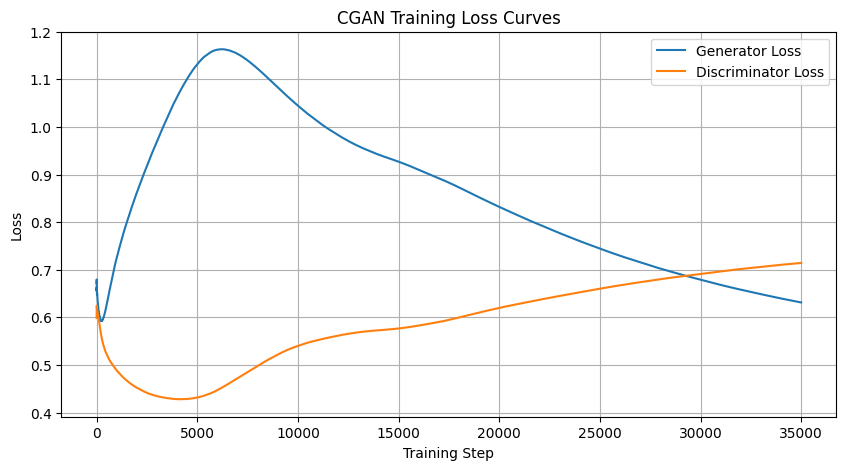

In [ ]:
# Train the model
trained_generator, g_losses, d_losses = train_cgan(
    generator, discriminator,
    train_data=train_no_label.values,
    label_data=train[label_cols].values,
    rand_dim=100,
    batch_size=64,
    steps=35000,
    log_interval=500
)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(g_losses, label='Generator Loss')
plt.plot(d_losses, label='Discriminator Loss')
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.title("CGAN Training Loss Curves")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
## GENERATE SAMPLE SYNTHETIC FEMALE DATA

def generate_synthetic_samples(generator, num_samples, gender_label, rand_dim=100):
    noise = np.random.normal(0, 1, (num_samples, rand_dim))
    labels = np.full((num_samples, 1), gender_label)  # 0 = female
    synthetic_data = generator.predict([noise, labels])
    return synthetic_data



synthetic_females = generate_synthetic_samples(trained_generator, num_samples=14567, gender_label=0)

456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
# Select real female rows (Gender_Male == 0)
real_females = train[(train['Gender_Male'] == 0)].copy()

# Create a DataFrame for synthetic females (use same columns as train_no_label)
synthetic_females_df = pd.DataFrame(synthetic_females, columns=data_cols)

# Add Gender_Male = 0 explicitly to match real female rows
synthetic_females_df['Gender_Male'] = 0

#inverse scale back to actual loan amounts since I previously used MinMaxscaler to scale amount
synthetic_females_df[data_cols] = scaler.inverse_transform(synthetic_females_df[data_cols])
real_females[data_cols] = scaler.inverse_transform(real_females[data_cols])

In [ ]:
print("📊 Loan Amount Comparison:")
print("Real Female Loan Amount:")
print(real_females['Amount'].describe())
print("\nSynthetic Female Loan Amount:")
print(synthetic_females_df['Amount'].describe())

print("\n📊 IncomeTotal Comparison:")
print("Real Female IncomeTotal:")
print(real_females['IncomeTotal'].describe())
print("\nSynthetic Female IncomeTotal:")
print(synthetic_females_df['IncomeTotal'].describe())

print("\n📊 Age Comparison:")
print("Real Female Age:")
print(real_females['Age'].describe())
print("\nSynthetic Female Age:")
print(synthetic_females_df['Age'].describe())


print("\n📊 LiabilitiesTotal Comparison:")
print("Real Female LiabilitiesTotal:")
print(real_females['LiabilitiesTotal'].describe())
print("\nSynthetic Female LiabilitiesTotal:")
print(synthetic_females_df['LiabilitiesTotal'].describe())



📊 Loan Amount Comparison:
Real Female Loan Amount:
count    14567.000000
mean         7.623365
std          0.861728
min          4.266936
25%          6.966967
50%          7.661998
75%          8.318986
max          9.271718
Name: Amount, dtype: float64

Synthetic Female Loan Amount:
count    14567.000000
mean         6.753271
std          1.605467
min          4.266936
25%          5.153840
50%          7.158576
75%          8.162242
max          9.239032
Name: Amount, dtype: float64

📊 IncomeTotal Comparison:
Real Female IncomeTotal:
count    14567.000000
mean         7.071753
std          0.574859
min          5.587249
25%          6.634633
50%          7.082549
75%          7.496097
max          8.814479
Name: IncomeTotal, dtype: float64

Synthetic Female IncomeTotal:
count    14567.000000
mean         6.507358
std          0.775754
min          5.604393
25%          5.985702
50%          6.228470
75%          6.700243
max          8.818804
Name: IncomeTotal, dtype: float64

📊 Ag

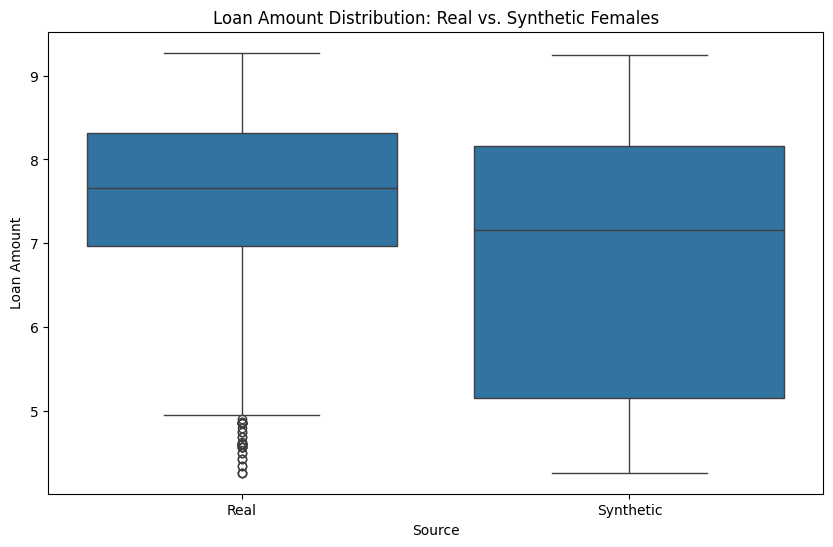

In [ ]:
## Compare synthetic and real values using Boxplot

plt.figure(figsize=(10, 6))

# Combine both into one DataFrame for boxplot
combined = pd.DataFrame({
    'Loan_Amount': pd.concat([
        real_females['Amount'],
        synthetic_females_df['Amount']
    ], ignore_index=True),
    'Source': ['Real'] * len(real_females) + ['Synthetic'] * len(synthetic_females_df)
})

sns.boxplot(x='Source', y='Loan_Amount', data=combined)
plt.title('Loan Amount Distribution: Real vs. Synthetic Females')
plt.ylabel('Loan Amount')
plt.show()

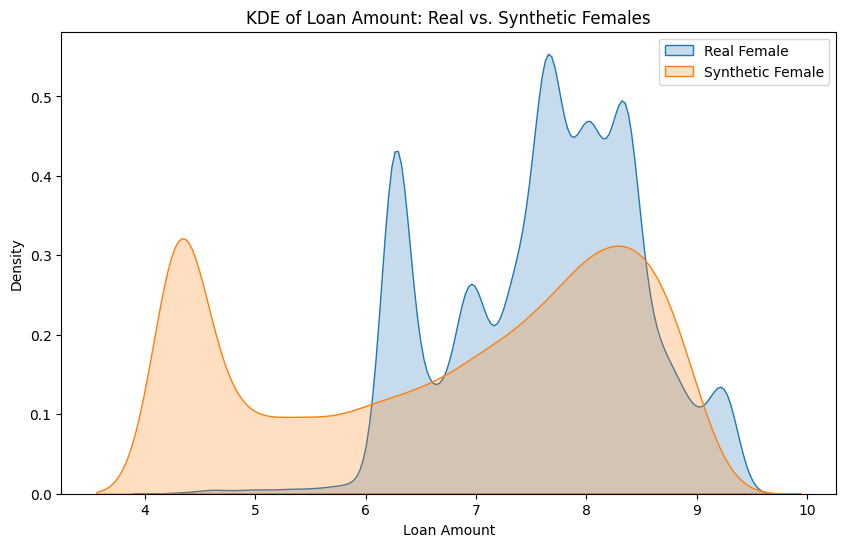

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(real_females['Amount'], label='Real Female', fill=True)
sns.kdeplot(synthetic_females_df['Amount'], label='Synthetic Female', fill=True)

plt.title('KDE of Loan Amount: Real vs. Synthetic Females')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend()
plt.show()


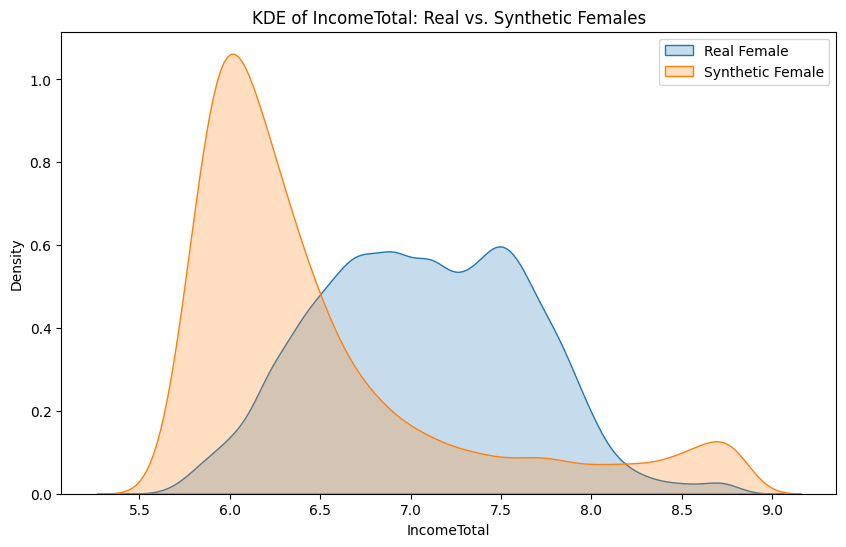

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(real_females['IncomeTotal'], label='Real Female', fill=True)
sns.kdeplot(synthetic_females_df['IncomeTotal'], label='Synthetic Female', fill=True)

plt.title('KDE of IncomeTotal: Real vs. Synthetic Females')
plt.xlabel('IncomeTotal')
plt.ylabel('Density')
plt.legend()
plt.show()


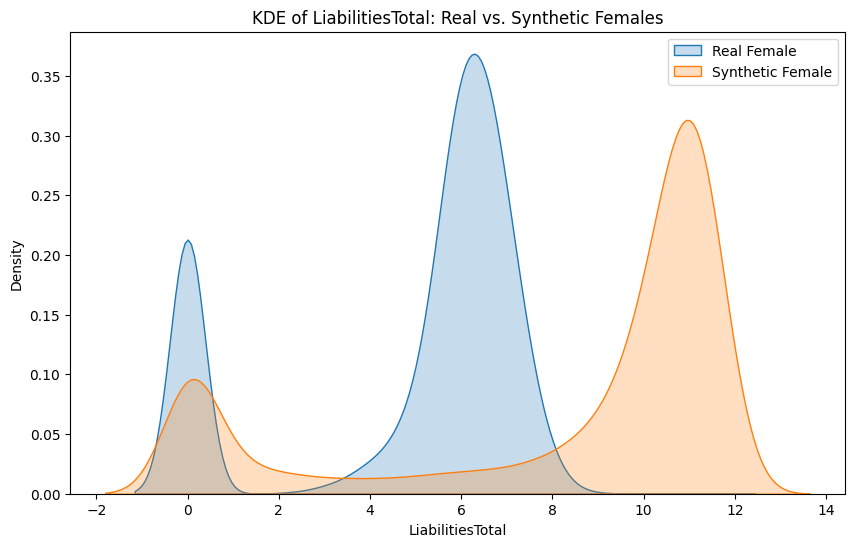

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(real_females['LiabilitiesTotal'], label='Real Female', fill=True)
sns.kdeplot(synthetic_females_df['LiabilitiesTotal'], label='Synthetic Female', fill=True)

plt.title('KDE of LiabilitiesTotal: Real vs. Synthetic Females')
plt.xlabel('LiabilitiesTotal')
plt.ylabel('Density')
plt.legend()
plt.show()

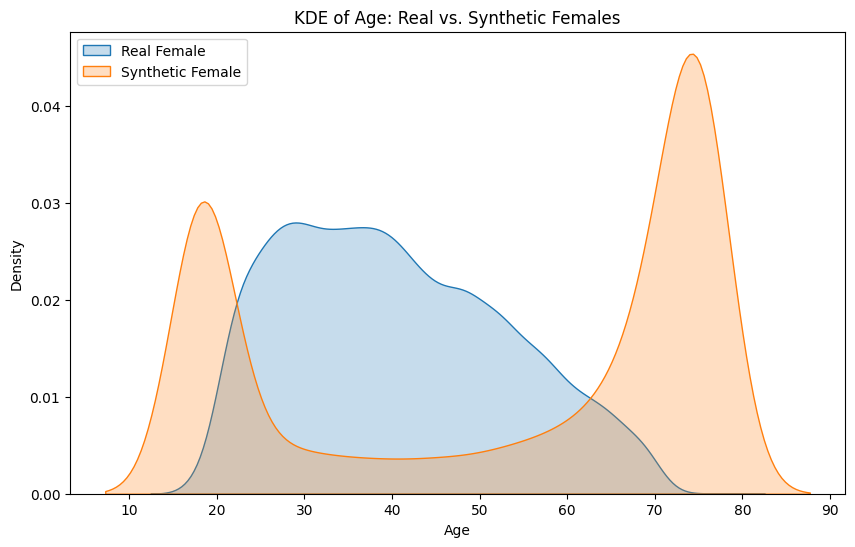

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(real_females['Age'], label='Real Female', fill=True)
sns.kdeplot(synthetic_females_df['Age'], label='Synthetic Female', fill=True)

plt.title('KDE of Age: Real vs. Synthetic Females')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

#### Correlation and Feature relationships

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

metrics = []

for col in data_cols:
    real_col = real_females[col].values
    synth_col = synthetic_females_df[col].values

    # Pearson
    pearson_corr, _ = pearsonr(real_col, synth_col)

    # Spearman
    spearman_corr, _ = spearmanr(real_col, synth_col)

    # Covariance
    cov = np.cov(real_col, synth_col)[0, 1]

    metrics.append({
        "Feature": col,
        "Pearson Correlation": pearson_corr,
        "Spearman Correlation": spearman_corr,
        "Covariance": cov
    })

# Create DataFrame
correlation_metrics_df = pd.DataFrame(metrics)

# Sort by absolute Pearson correlation
correlation_metrics_df["|Pearson|"] = correlation_metrics_df["Pearson Correlation"].abs()
correlation_metrics_df = correlation_metrics_df.sort_values(by="|Pearson|", ascending=False).drop(columns="|Pearson|")

correlation_metrics_df.reset_index(drop=True, inplace=True)
correlation_metrics_df.round(4)



,Feature,Pearson Correlation,Spearman Correlation,Covariance
0,OccupationArea_Transport_and_warehousing,0.0209,0.0212,0.0000
1,CreditScoreEsMicroL_M2,0.0196,0.0116,0.0004
2,Education,0.0182,0.0183,0.0139
3,OccupationArea_Energy,-0.0155,-0.0105,-0.0002
4,Age,-0.0148,-0.0150,-4.5689
...,...,...,...,...
62,VerificationType_Income_verified,-0.0009,0.0011,-0.0000
63,UseOfLoan_Vehicle,0.0006,-0.0081,0.0000
64,CreditScoreEsMicroL_M3,0.0005,0.0055,0.0000
65,PreviousEarlyRepaymentsCountBeforeLoan,0.0003,0.0101,0.0000


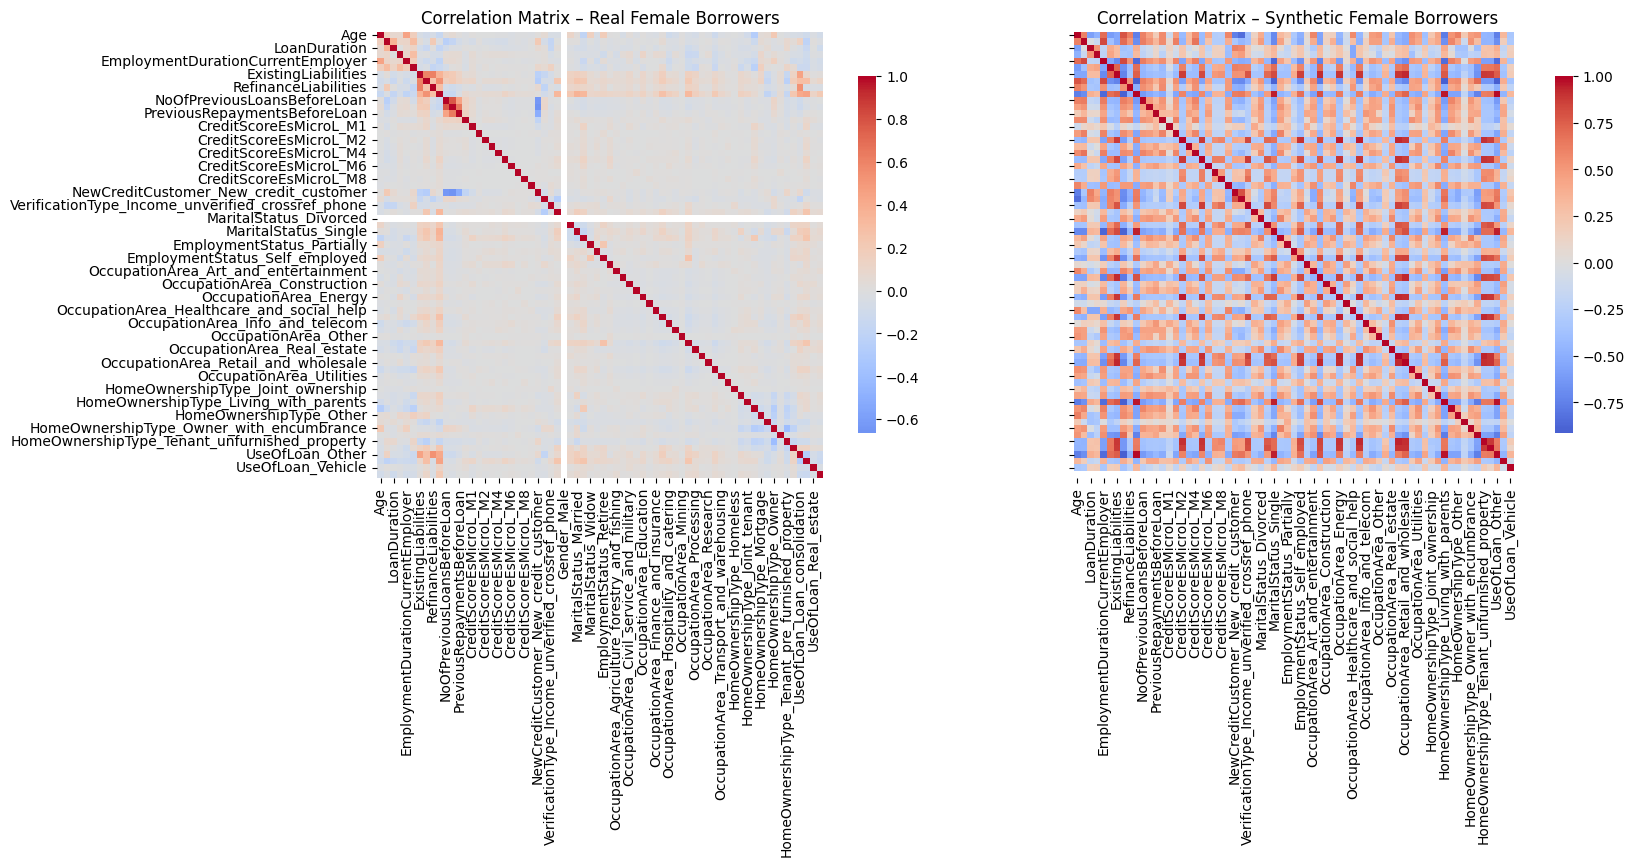

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
real_female_numeric = real_females.select_dtypes(include=[np.number])
synthetic_female_numeric = synthetic_females_df.select_dtypes(include=[np.number])

# Compute correlation matrices
corr_real = real_female_numeric.corr()
corr_synth = synthetic_female_numeric.corr()

# Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Real data heatmap
sns.heatmap(corr_real, ax=axes[0], cmap='coolwarm', center=0,
            cbar_kws={'shrink': 0.8}, annot=False, square=True)
axes[0].set_title('Correlation Matrix – Real Female Borrowers')

# Synthetic data heatmap
sns.heatmap(corr_synth, ax=axes[1], cmap='coolwarm', center=0,
            cbar_kws={'shrink': 0.8}, annot=False, square=True)
axes[1].set_title('Correlation Matrix – Synthetic Female Borrowers')

plt.tight_layout()
plt.show()


In [ ]:
# Check pairwise Pearson correlations


pairs_to_check = [('IncomeTotal', 'FreeCash'), ('Age', 'LoanDuration')]

for col1, col2 in pairs_to_check:
    real_corr = real_females[[col1, col2]].corr(method='pearson').iloc[0,1]
    synth_corr = synthetic_females_df[[col1, col2]].corr(method='pearson').iloc[0,1]
    print(f"{col1} vs {col2} — Real: {real_corr:.3f}, Synthetic: {synth_corr:.3f}")


IncomeTotal vs FreeCash — Real: -0.136, Synthetic: 0.687
Age vs LoanDuration — Real: 0.075, Synthetic: -0.587


### Augmentation of Models with Synthetic Data

In [ ]:
# ===== Model D: Augment Model 1 (Unbalanced) with Synthetic Females =====
model_d_train = pd.concat([X_train.copy(), synthetic_females_df.drop(columns=['Amount'])], ignore_index=True)
model_d_y = pd.concat([y_train.copy(), synthetic_females_df['Amount']], ignore_index=True)

# Align columns to test set
model_d_train = model_d_train.reindex(columns=X_test.columns, fill_value=0)
model_d_train = model_d_train.astype(float)

xgb_model_d = XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse')
xgb_model_d.fit(model_d_train, model_d_y)



# ===== Predictions on original test sets =====
pred_d = xgb_model_d.predict(X_test)




In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt

# Model D (Unbalanced + Synthetic)
r2_d = r2_score(y_test, pred_d)
rmse_d = mean_squared_error(y_test, pred_d) ** 0.5
cv_d = cross_val_score(xgb_model_d, model_d_train, model_d_y, cv=5, scoring='r2').mean()


print("Model D Performance:")
print(f"  R²: {r2_d:.4f}, RMSE: {rmse_d:.4f}, CV Score: {cv_d:.4f}\n")


Model D Performance:
  R²: 0.5231, RMSE: 0.6932, CV Score: 0.6712



<Figure size 1000x800 with 0 Axes>

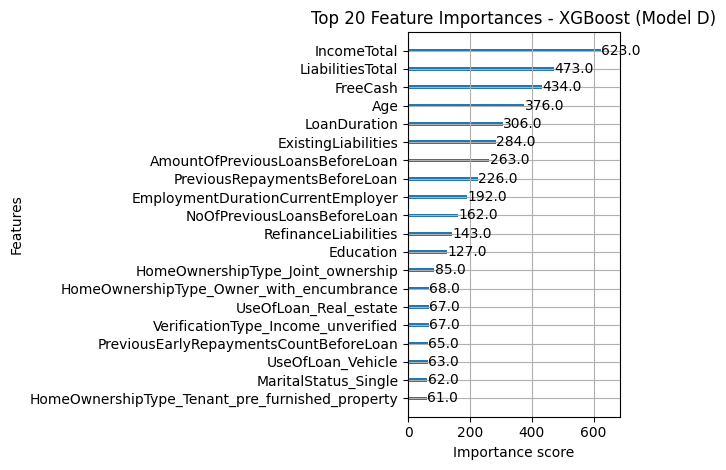

In [ ]:
# Plotting feature importance for the XGBoost model from Model 2 (gender-balanced)
plt.figure(figsize=(10, 8))
plot_importance(xgb_model_d, importance_type='weight', max_num_features=20)
plt.title("Top 20 Feature Importances - XGBoost (Model D)")
plt.tight_layout()
plt.show()

### Model E - Balanced by Gender Using Real + Synthetic Females

In [ ]:
## GENERATE SAMPLE SYNTHETIC FEMALE DATA

def generate_synthetic_samples(generator, num_samples, gender_label, rand_dim=100):
    noise = np.random.normal(0, 1, (num_samples, rand_dim))
    labels = np.full((num_samples, 1), gender_label)  # 0 = female
    synthetic_data = generator.predict([noise, labels])
    return synthetic_data



synthetic_females2 = generate_synthetic_samples(trained_generator, num_samples=27551, gender_label=0)

861/861 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
# Select real female rows (Gender_Male == 0)
real_females = train[(train['Gender_Male'] == 0)].copy()

# Create a DataFrame for synthetic females (use same columns as train_no_label)
synthetic_females_df2 = pd.DataFrame(synthetic_females2, columns=data_cols)

# Add Gender_Male = 0 explicitly to match real female rows
synthetic_females_df2['Gender_Male'] = 0

#inverse scale back to actual loan amounts since I previously used MinMaxscaler to scale amount
synthetic_females_df2[data_cols] = scaler.inverse_transform(synthetic_females_df2[data_cols])
real_females[data_cols] = scaler.inverse_transform(real_females[data_cols])

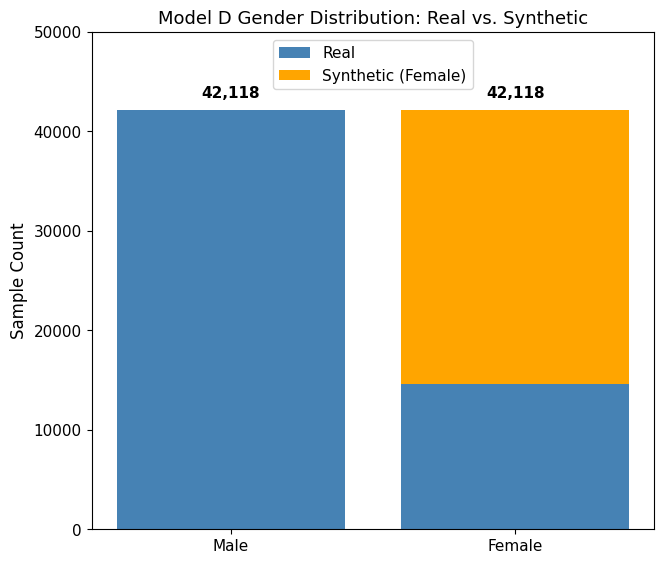

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count real male and female
real_gender_counts = main_data2['Gender_Male'].value_counts()
real_males = real_gender_counts.get(1, 0)
real_females = real_gender_counts.get(0, 0)

# Count synthetic females
synthetic_females = synthetic_females_df2.shape[0]

# Build plotting DataFrame
plot_df = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Real': [real_males, real_females],
    'Synthetic': [0, synthetic_females]
})

# Plot
fig, ax = plt.subplots(figsize=(7, 6))

bars_real = ax.bar(plot_df['Gender'], plot_df['Real'], label='Real', color='steelblue')
bars_synth = ax.bar(plot_df['Gender'], plot_df['Synthetic'], bottom=plot_df['Real'], label='Synthetic (Female)', color='orange')

# Add total count labels above bars
for idx, row in plot_df.iterrows():
    total = row['Real'] + row['Synthetic']
    ax.text(idx, total + 1000, f"{total:,}", ha='center', va='bottom', fontweight='bold', fontsize=11)

# Labels, ticks, limits
ax.set_ylabel("Sample Count", fontsize=12)
ax.set_title("Model D Gender Distribution: Real vs. Synthetic", fontsize=13)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontsize=11)
ax.set_ylim(0, 50000)  # set y-axis to max at 50,000
ax.tick_params(axis='y', labelsize=11)
ax.legend(fontsize=11)

plt.tight_layout(pad=2)
plt.show()



In [ ]:
# ===== Model E: Augment Model 1 (Unbalanced) with Synthetic Females to make Males and Females exactly equal=====
model_e_train = pd.concat([X_train.copy(), synthetic_females_df2.drop(columns=['Amount'])], ignore_index=True)
model_e_y = pd.concat([y_train.copy(), synthetic_females_df2['Amount']], ignore_index=True)

# Align columns to test set
model_e_train = model_e_train.reindex(columns=X_test.columns, fill_value=0)
model_e_train = model_e_train.astype(float)

xgb_model_e = XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse')
xgb_model_e.fit(model_e_train, model_e_y)



# ===== Predictions on original test sets =====
pred_e = xgb_model_e.predict(X_test)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt

# Model E (Unbalanced + Synthetic female which match males)
r2_e = r2_score(y_test, pred_e)
rmse_e = mean_squared_error(y_test, pred_e) ** 0.5
cv_e = cross_val_score(xgb_model_e, model_e_train, model_e_y, cv=5, scoring='r2').mean()


print("Model E Performance:")
print(f"  R²: {r2_e:.4f}, RMSE: {rmse_e:.4f}, CV Score: {cv_e:.4f}\n")

Model E Performance:
  R²: 0.5157, RMSE: 0.6985, CV Score: 0.6737



<Figure size 1000x800 with 0 Axes>

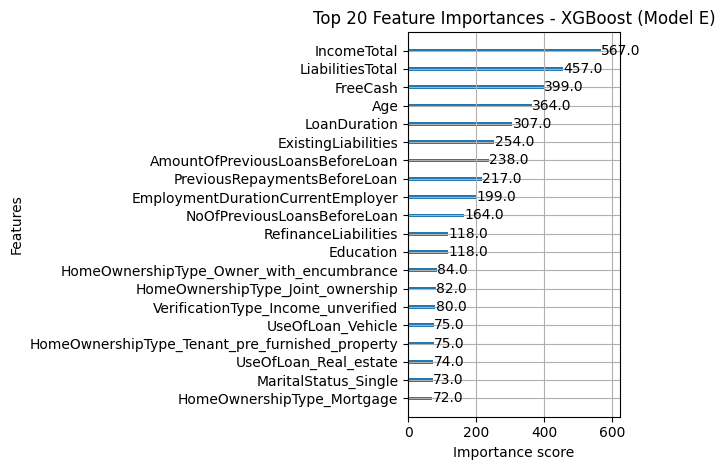

In [ ]:
# Plotting feature importance for the XGBoost model from Model 2 (gender-balanced)
plt.figure(figsize=(10, 8))
plot_importance(xgb_model_e, importance_type='weight', max_num_features=20)
plt.title("Top 20 Feature Importances - XGBoost (Model E)")
plt.tight_layout()
plt.show()

### Fairness

In [ ]:
# ===== Fairness Metrics for Models D and E =====
gender_test_d = X_test['Gender_Male'].values
gender_test_e = X_test['Gender_Male'].values

def mean_residual_difference(y_true, y_pred, gender):
    residuals = y_true - y_pred
    return np.mean(residuals[gender == 0]) - np.mean(residuals[gender == 1])

def group_rmse(y_true, y_pred, gender):
    rmse_male = np.sqrt(np.mean((y_true[gender == 1] - y_pred[gender == 1]) ** 2))
    rmse_female = np.sqrt(np.mean((y_true[gender == 0] - y_pred[gender == 0]) ** 2))
    return rmse_female, rmse_male

def between_group_variance(y_pred, gender):
    group_means = [np.mean(y_pred[gender == g]) for g in [0, 1]]
    return np.var(group_means)

res_diff_d = mean_residual_difference(y_test, pred_d, gender_test_d)
rmse_female_d, rmse_male_d = group_rmse(y_test, pred_d, gender_test_d)
var_between_d = between_group_variance(pred_d, gender_test_d)

res_diff_e = mean_residual_difference(y_test, pred_e, gender_test_e)
rmse_female_e, rmse_male_e = group_rmse(y_test, pred_e, gender_test_e)
var_between_e = between_group_variance(pred_e, gender_test_e)

# ===== Compile Results =====
regression_fairness_augmented_df = pd.DataFrame({
    "Mean Residual Diff (F-M)": [res_diff_d, res_diff_e],
    "RMSE (Female)": [rmse_female_d, rmse_female_e],
    "RMSE (Male)": [rmse_male_d, rmse_male_e],
    "Between-Group Variance": [var_between_d, var_between_e]
}, index=["Model D (Unbalanced + Synthetic)", "Model E (Balanced Female = Male)"])

# ===== Display =====
print(regression_fairness_augmented_df)


                                  Mean Residual Diff (F-M)  RMSE (Female)  \
Model D (Unbalanced + Synthetic)                 -0.009796       0.652664   
Model E (Balanced Female = Male)                 -0.008398       0.659613   

                                  RMSE (Male)  Between-Group Variance  
Model D (Unbalanced + Synthetic)     0.706452                0.007689  
Model E (Balanced Female = Male)     0.711267                0.007567  


In [ ]:
# ===== SHAP SETUP =====

explainer_d = shap.Explainer(xgb_model_d)
explainer_e = shap.Explainer(xgb_model_e)

shap_values_d = explainer_d(X_test)
shap_values_e = explainer_e(X_test)

# ===== GENDER FEATURE SHAP ANALYSIS =====

gender_index_d = list(X_test.columns).index("Gender_Male")
gender_index_e = list(X_test.columns).index("Gender_Male")

gender_shap_d = shap_values_d.values[:, gender_index_d]
gender_shap_e = shap_values_e.values[:, gender_index_e]

print("\nModel D — Mean SHAP value for Gender_Male:", gender_shap_d.mean())
print("Model E — Mean SHAP value for Gender_Male:", gender_shap_e.mean())


Model D — Mean SHAP value for Gender_Male: 0.001198853
Model E — Mean SHAP value for Gender_Male: 0.0011289248


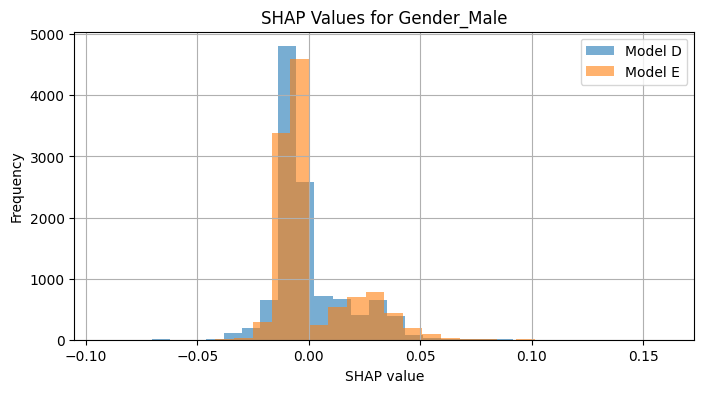

In [ ]:
# ===== OPTIONAL: PLOT SHAP VALUES FOR GENDER =====
plt.figure(figsize=(8, 4))
plt.hist(gender_shap_c, bins=30, alpha=0.6, label='Model D')
plt.hist(gender_shap_d, bins=30, alpha=0.6, label='Model E')
plt.title("SHAP Values for Gender_Male")
plt.xlabel("SHAP value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
## Model D (Average SHAP by Actual Gender)

# SHAP Explainer and Values
explainer_d = shap.Explainer(xgb_model_d)
shap_values_d = explainer_d(X_test)

# Extract SHAP values for Gender_Male
gender_shap_d = shap_values_d.values[:, X_test.columns.get_loc("Gender_Male")]

# Create DataFrame to join SHAP values with actual gender
gender_df_d = X_test.copy()
gender_df_d["Gender_SHAP"] = gender_shap_d

# Average SHAP value for Gender_Male by actual gender
avg_shap_d_by_gender = gender_df_d.groupby("Gender_Male")["Gender_SHAP"].mean()

print("🔹 Model D — Avg SHAP for Gender_Male by actual gender:")
print(avg_shap_d_by_gender)


🔹 Model D — Avg SHAP for Gender_Male by actual gender:
Gender_Male
False    0.028042
True    -0.007930
Name: Gender_SHAP, dtype: float32


In [ ]:
## Model E (Average SHAP by Actual Gender)

# SHAP Explainer and Values
explainer_e = shap.Explainer(xgb_model_e)
shap_values_e = explainer_e(X2_test)

# Extract SHAP values for Gender_Male
gender_shap_e = shap_values_e.values[:, X2_test.columns.get_loc("Gender_Male")]

# Create DataFrame to join SHAP values with actual gender
gender_df_e = X2_test.copy()
gender_df_e["Gender_SHAP"] = gender_shap_e

# Average SHAP value for Gender_Male by actual gender
avg_shap_e_by_gender = gender_df_e.groupby("Gender_Male")["Gender_SHAP"].mean()

print("🔹 Model E — Avg SHAP for Gender_Male by actual gender:")
print(avg_shap_e_by_gender)


🔹 Model E — Avg SHAP for Gender_Male by actual gender:
Gender_Male
False    0.019404
True    -0.005086
Name: Gender_SHAP, dtype: float32
